# Industry Accelerators - Sales Prediction using Weather Company Data

## Weather Company Data Limited Edition : Build Predictive Models

### Data Disclaimer

The weather and business input data provided in this Accelerator is simulated data, designed to illustrate how to solve a common business problem. You are not permitted to utilize the simulated data contained in the Accelerator outside of this Accelerator or the Sample Materials contained within it.

### Copyright

**This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020, 2023. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.**

### Terms and Conditions

The terms under which you are licensing IBM Cloud Pak for Data also apply to your use of the Industry Accelerators. 
 
Before you use the Industry Accelerators, you must agree on these additional terms and conditions that are set forth here.
 
This information contains sample modules, exercises, and code samples (the code may be provided in source code form (“Source Code”)) (collectively “Sample Materials”).

### License
 
Subject to the terms herein, you may copy, modify, and distribute these Sample Materials within your enterprise only, for your internal use only; provided such use is within the limits of the license rights of the IBM agreement under which you are licensing IBM Cloud Pak for Data.
 
The Industry Accelerators might include applicable third-party licenses. Review the third-party licenses before you use any of the Industry Accelerators. You can find the third-party licenses that apply to each Sample Material in the notices.txt file that is included with each Sample Material.

### Code Security
 
Source Code may not be disclosed to any third parties for any reason without IBM’s prior written consent, and access must be limited to your employees who have a need to know. 
 
You have implemented and will maintain the technical and personnel focused security policies, procedures, and controls that are necessary to protect the Source Code against loss, alteration, unlawful forms of processing, unauthorized disclosure, and unauthorized access.
 
You will promptly (and in no event any later than 48 hours) notify IBM after becoming aware of any breach or other security incident that you know, or should reasonably suspect, affects or will affect the Source Code or IBM, and will provide IBM with reasonably requested information about such security incident and the status of any remediation and restoration activities.
 
You will not permit any Source Code to reside on servers located in the Russian Federation, the People’s Republic of China, or any territories worldwide in which the Russian Federation or People’s Republic of China claim sovereignty (collectively, “China or Russia”).  Company shall not permit anyone to access or use any such Source Code from or within China or Russia, and Company will not permit any development, testing, or other work to occur in China or Russia that would require such access or use.  Upon reasonable written notice, IBM may extend these restrictions to other countries that the United States government identifies as potential cyber security concerns.
IBM may request that you verify compliance with these Code Security obligations, and you agree to cooperate with IBM in that regard.

### General
 
Notwithstanding anything to the contrary, IBM PROVIDES THE SAMPLE MATERIALS ON AN "AS IS" BASIS AND IBM DISCLAIMS ALL WARRANTIES, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY IMPLIED WARRANTIES OR CONDITIONS OF MERCHANTABILITY, SATISFACTORY QUALITY, FITNESS FOR A PARTICULAR PURPOSE, TITLE, AND ANY WARRANTY OR CONDITION OF NON-INFRINGEMENT. IBM SHALL NOT BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY OR ECONOMIC CONSEQUENTIAL DAMAGES ARISING OUT OF THE USE OR OPERATION OF THE SAMPLE MATERIALS. IBM SHALL NOT BE LIABLE FOR LOSS OF, OR DAMAGE TO, DATA, OR FOR LOST PROFITS, BUSINESS REVENUE, GOODWILL, OR ANTICIPATED SAVINGS. IBM HAS NO OBLIGATION TO PROVIDE MAINTENANCE, SUPPORT, UPDATES, ENHANCEMENTS OR MODIFICATIONS TO THE SAMPLE MATERIALS.


## Introduction

This notebook computes machine-learning models to predict daily product sales per location (place id) using coincident weather measurements and discount values. These models permit the identification or/and exploration of which weather variables most likely impact sales for a specific product across multiple business locations. Since product sales (target variable aka dependent variable) is a continuous-valued variable, the machine-learning models use regression algorithms to estimate predictive relationships. <br>

This notebook loads unprocessed datasets (i.e., *fauxweather1.csv* and *fauxsales1.csv*) then uses the analysis specifications of a configuration file (i.e., *STEP 0.1*) to sequentially (a) transform the data into apt modeling input data, (b) build multiple predictive models, (c) save the models, and (d) deploy the models for later application. The datasets and configuration file have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project. Likewise, all notebooks have storage in the `/project_data/notebook/` directory of the provided WML CP4D project.


## Data Schemata

### Dataset: Faux Client Sales

**date:**  the daily date (string) ("%Y%m%d" format)<br>
**dateandtime:** the daily "date and time" timestamp (string) ("%Y%m%d %H:%M:%S" format)<br>
**placeId:** the ID of the place (e.g., branch, store, other locale) (string)<br>
**placeName:** the name of the place (e.g., branch, store, other locale) (string)<br>
**postalcode:** the postal code of the place (e.g., branch, store, other locale) (string)<br>
**countrycode:** the country of the place (e.g., branch, store, other locale) (string)<br>
**productname:** the name of the sold product (string)<br>
**producttype:** the type, category, or other product taxonomy/hierarchy level of the sold product (string)<br>
**discount:** the discount fraction of the sold product (float)<br>
**closed:** the daily status of the place being closed to not selling products (boolean) (True: place closed on date; False: place open on date)<br>
**sales:** the total product sales on the daily date (float)<br>

### Dataset: Faux TWC Weather
The weather data encompasses 11 weather aspects (i.e., MSLP; RelativeHumidity; Temperature; UVIndex; Dewpoint; FeelsLike; WindSpeed; Visibility; Gust; PrecipAmount; SnowAmount) (see below details on aspect descriptions), over 7 aggregation time periods (see below details on time interval descriptions), and exactly 3 aggregation functions (i.e., Avg, Max, Min).  Note: All variables (dataframe columns) with the ‘LocalDay’ time period record a ‘day’ as a "midnight to midnight" interval while all other columns represent a ‘day’ as a "7 am to 7 am" interval.  The following list completely annotates the entire measured weather-related variables: 

* DewpointLocalDayAvg, DewpointLocalDayMax, DewpointLocalDayMin, DewpointLocalDaytimeAvg, DewpointLocalDaytimeMax, DewpointLocalDaytimeMin, DewpointLocalNighttimeAvg, DewpointLocalNighttimeMax, DewpointLocalNighttimeMin, DewpointLocalMorningAvg, DewpointLocalMorningMax, DewpointLocalMorningMin, DewpointLocalAfternoonAvg, DewpointLocalAfternoonMax, DewpointLocalAfternoonMin, DewpointLocalEveningAvg, DewpointLocalEveningMax, DewpointLocalEveningMin, DewpointLocalOvernightAvg, DewpointLocalOvernightMax, DewpointLocalOvernightMin, FeelsLikeLocalDayAvg, FeelsLikeLocalDayMax, FeelsLikeLocalDayMin, FeelsLikeLocalDaytimeAvg, FeelsLikeLocalDaytimeMax, FeelsLikeLocalDaytimeMin, FeelsLikeLocalNighttimeAvg, FeelsLikeLocalNighttimeMax, FeelsLikeLocalNighttimeMin, FeelsLikeLocalMorningAvg, FeelsLikeLocalMorningMax, FeelsLikeLocalMorningMin, FeelsLikeLocalAfternoonAvg, FeelsLikeLocalAfternoonMax, FeelsLikeLocalAfternoonMin, FeelsLikeLocalEveningAvg, FeelsLikeLocalEveningMax, FeelsLikeLocalEveningMin, FeelsLikeLocalOvernightAvg, FeelsLikeLocalOvernightMax, FeelsLikeLocalOvernightMin, GustLocalDayAvg, GustLocalDayMax, GustLocalDayMin, GustLocalDaytimeAvg, GustLocalDaytimeMax, GustLocalDaytimeMin, GustLocalNighttimeAvg, GustLocalNighttimeMax, GustLocalNighttimeMin, GustLocalMorningAvg, GustLocalMorningMax, GustLocalMorningMin, GustLocalAfternoonAvg, GustLocalAfternoonMax, GustLocalAfternoonMin, GustLocalEveningAvg, GustLocalEveningMax, GustLocalEveningMin, GustLocalOvernightAvg, GustLocalOvernightMax, GustLocalOvernightMin, MSLPLocalDayAvg, MSLPLocalDayMax, MSLPLocalDayMin, MSLPLocalDaytimeAvg, MSLPLocalDaytimeMax, MSLPLocalDaytimeMin, MSLPLocalNighttimeAvg, MSLPLocalNighttimeMax, MSLPLocalNighttimeMin, MSLPLocalMorningAvg, MSLPLocalMorningMax, MSLPLocalMorningMin, MSLPLocalAfternoonAvg, MSLPLocalAfternoonMax, MSLPLocalAfternoonMin, MSLPLocalEveningAvg, MSLPLocalEveningMax, MSLPLocalEveningMin, MSLPLocalOvernightAvg, MSLPLocalOvernightMax, MSLPLocalOvernightMin, PrecipAmountLocalDayAvg, PrecipAmountLocalDayMax, PrecipAmountLocalDayMin, PrecipAmountLocalDaytimeAvg, PrecipAmountLocalDaytimeMax, PrecipAmountLocalDaytimeMin, PrecipAmountLocalNighttimeAvg, PrecipAmountLocalNighttimeMax, PrecipAmountLocalNighttimeMin, PrecipAmountLocalMorningAvg, PrecipAmountLocalMorningMax, PrecipAmountLocalMorningMin, PrecipAmountLocalAfternoonAvg, PrecipAmountLocalAfternoonMax, PrecipAmountLocalAfternoonMin, PrecipAmountLocalEveningAvg, PrecipAmountLocalEveningMax, PrecipAmountLocalEveningMin, PrecipAmountLocalOvernightAvg, PrecipAmountLocalOvernightMax, PrecipAmountLocalOvernightMin, RelativeHumidityLocalDayAvg, RelativeHumidityLocalDayMax, RelativeHumidityLocalDayMin, RelativeHumidityLocalDaytimeAvg, RelativeHumidityLocalDaytimeMax, RelativeHumidityLocalDaytimeMin, RelativeHumidityLocalNighttimeAvg, RelativeHumidityLocalNighttimeMax, RelativeHumidityLocalNighttimeMin, RelativeHumidityLocalMorningAvg, RelativeHumidityLocalMorningMax, RelativeHumidityLocalMorningMin, RelativeHumidityLocalAfternoonAvg, RelativeHumidityLocalAfternoonMax, RelativeHumidityLocalAfternoonMin, RelativeHumidityLocalEveningAvg, RelativeHumidityLocalEveningMax, RelativeHumidityLocalEveningMin, RelativeHumidityLocalOvernightAvg, RelativeHumidityLocalOvernightMax, RelativeHumidityLocalOvernightMin, SnowAmountLocalDayAvg, SnowAmountLocalDayMax, SnowAmountLocalDayMin, SnowAmountLocalDaytimeAvg, SnowAmountLocalDaytimeMax, SnowAmountLocalDaytimeMin, SnowAmountLocalNighttimeAvg, SnowAmountLocalNighttimeMax, SnowAmountLocalNighttimeMin, SnowAmountLocalMorningAvg, SnowAmountLocalMorningMax, SnowAmountLocalMorningMin, SnowAmountLocalAfternoonAvg, SnowAmountLocalAfternoonMax, SnowAmountLocalAfternoonMin, SnowAmountLocalEveningAvg, SnowAmountLocalEveningMax, SnowAmountLocalEveningMin, SnowAmountLocalOvernightAvg, SnowAmountLocalOvernightMax, SnowAmountLocalOvernightMin, TemperatureLocalDayAvg, TemperatureLocalDayMax, TemperatureLocalDayMin, TemperatureLocalDaytimeAvg, TemperatureLocalDaytimeMax, TemperatureLocalDaytimeMin, TemperatureLocalNighttimeAvg, TemperatureLocalNighttimeMax, TemperatureLocalNighttimeMin, TemperatureLocalMorningAvg, TemperatureLocalMorningMax, TemperatureLocalMorningMin, TemperatureLocalAfternoonAvg, TemperatureLocalAfternoonMax, TemperatureLocalAfternoonMin, TemperatureLocalEveningAvg, TemperatureLocalEveningMax, TemperatureLocalEveningMin, TemperatureLocalOvernightAvg, TemperatureLocalOvernightMax, TemperatureLocalOvernightMin, UVIndexLocalDayAvg, UVIndexLocalDayMax, UVIndexLocalDayMin, UVIndexLocalDaytimeAvg, UVIndexLocalDaytimeMax, UVIndexLocalDaytimeMin, UVIndexLocalNighttimeAvg, UVIndexLocalNighttimeMax, UVIndexLocalNighttimeMin, UVIndexLocalMorningAvg, UVIndexLocalMorningMax, UVIndexLocalMorningMin, UVIndexLocalAfternoonAvg, UVIndexLocalAfternoonMax, UVIndexLocalAfternoonMin, UVIndexLocalEveningAvg, UVIndexLocalEveningMax, UVIndexLocalEveningMin, UVIndexLocalOvernightAvg, UVIndexLocalOvernightMax, UVIndexLocalOvernightMin, VisibilityLocalDayAvg, VisibilityLocalDayMax, VisibilityLocalDayMin, VisibilityLocalDaytimeAvg, VisibilityLocalDaytimeMax, VisibilityLocalDaytimeMin, VisibilityLocalNighttimeAvg, VisibilityLocalNighttimeMax, VisibilityLocalNighttimeMin, VisibilityLocalMorningAvg, VisibilityLocalMorningMax, VisibilityLocalMorningMin, VisibilityLocalAfternoonAvg, VisibilityLocalAfternoonMax, VisibilityLocalAfternoonMin, VisibilityLocalEveningAvg, VisibilityLocalEveningMax, VisibilityLocalEveningMin, VisibilityLocalOvernightAvg, VisibilityLocalOvernightMax, VisibilityLocalOvernightMin, WindSpeedLocalDayAvg, WindSpeedLocalDayMax, WindSpeedLocalDayMin, WindSpeedLocalDaytimeAvg, WindSpeedLocalDaytimeMax, WindSpeedLocalDaytimeMin, WindSpeedLocalNighttimeAvg, WindSpeedLocalNighttimeMax, WindSpeedLocalNighttimeMin, WindSpeedLocalMorningAvg, WindSpeedLocalMorningMax, WindSpeedLocalMorningMin, WindSpeedLocalAfternoonAvg, WindSpeedLocalAfternoonMax, WindSpeedLocalAfternoonMin, WindSpeedLocalEveningAvg, WindSpeedLocalEveningMax, WindSpeedLocalEveningMin, WindSpeedLocalOvernightAvg, WindSpeedLocalOvernightMax, WindSpeedLocalOvernightMin


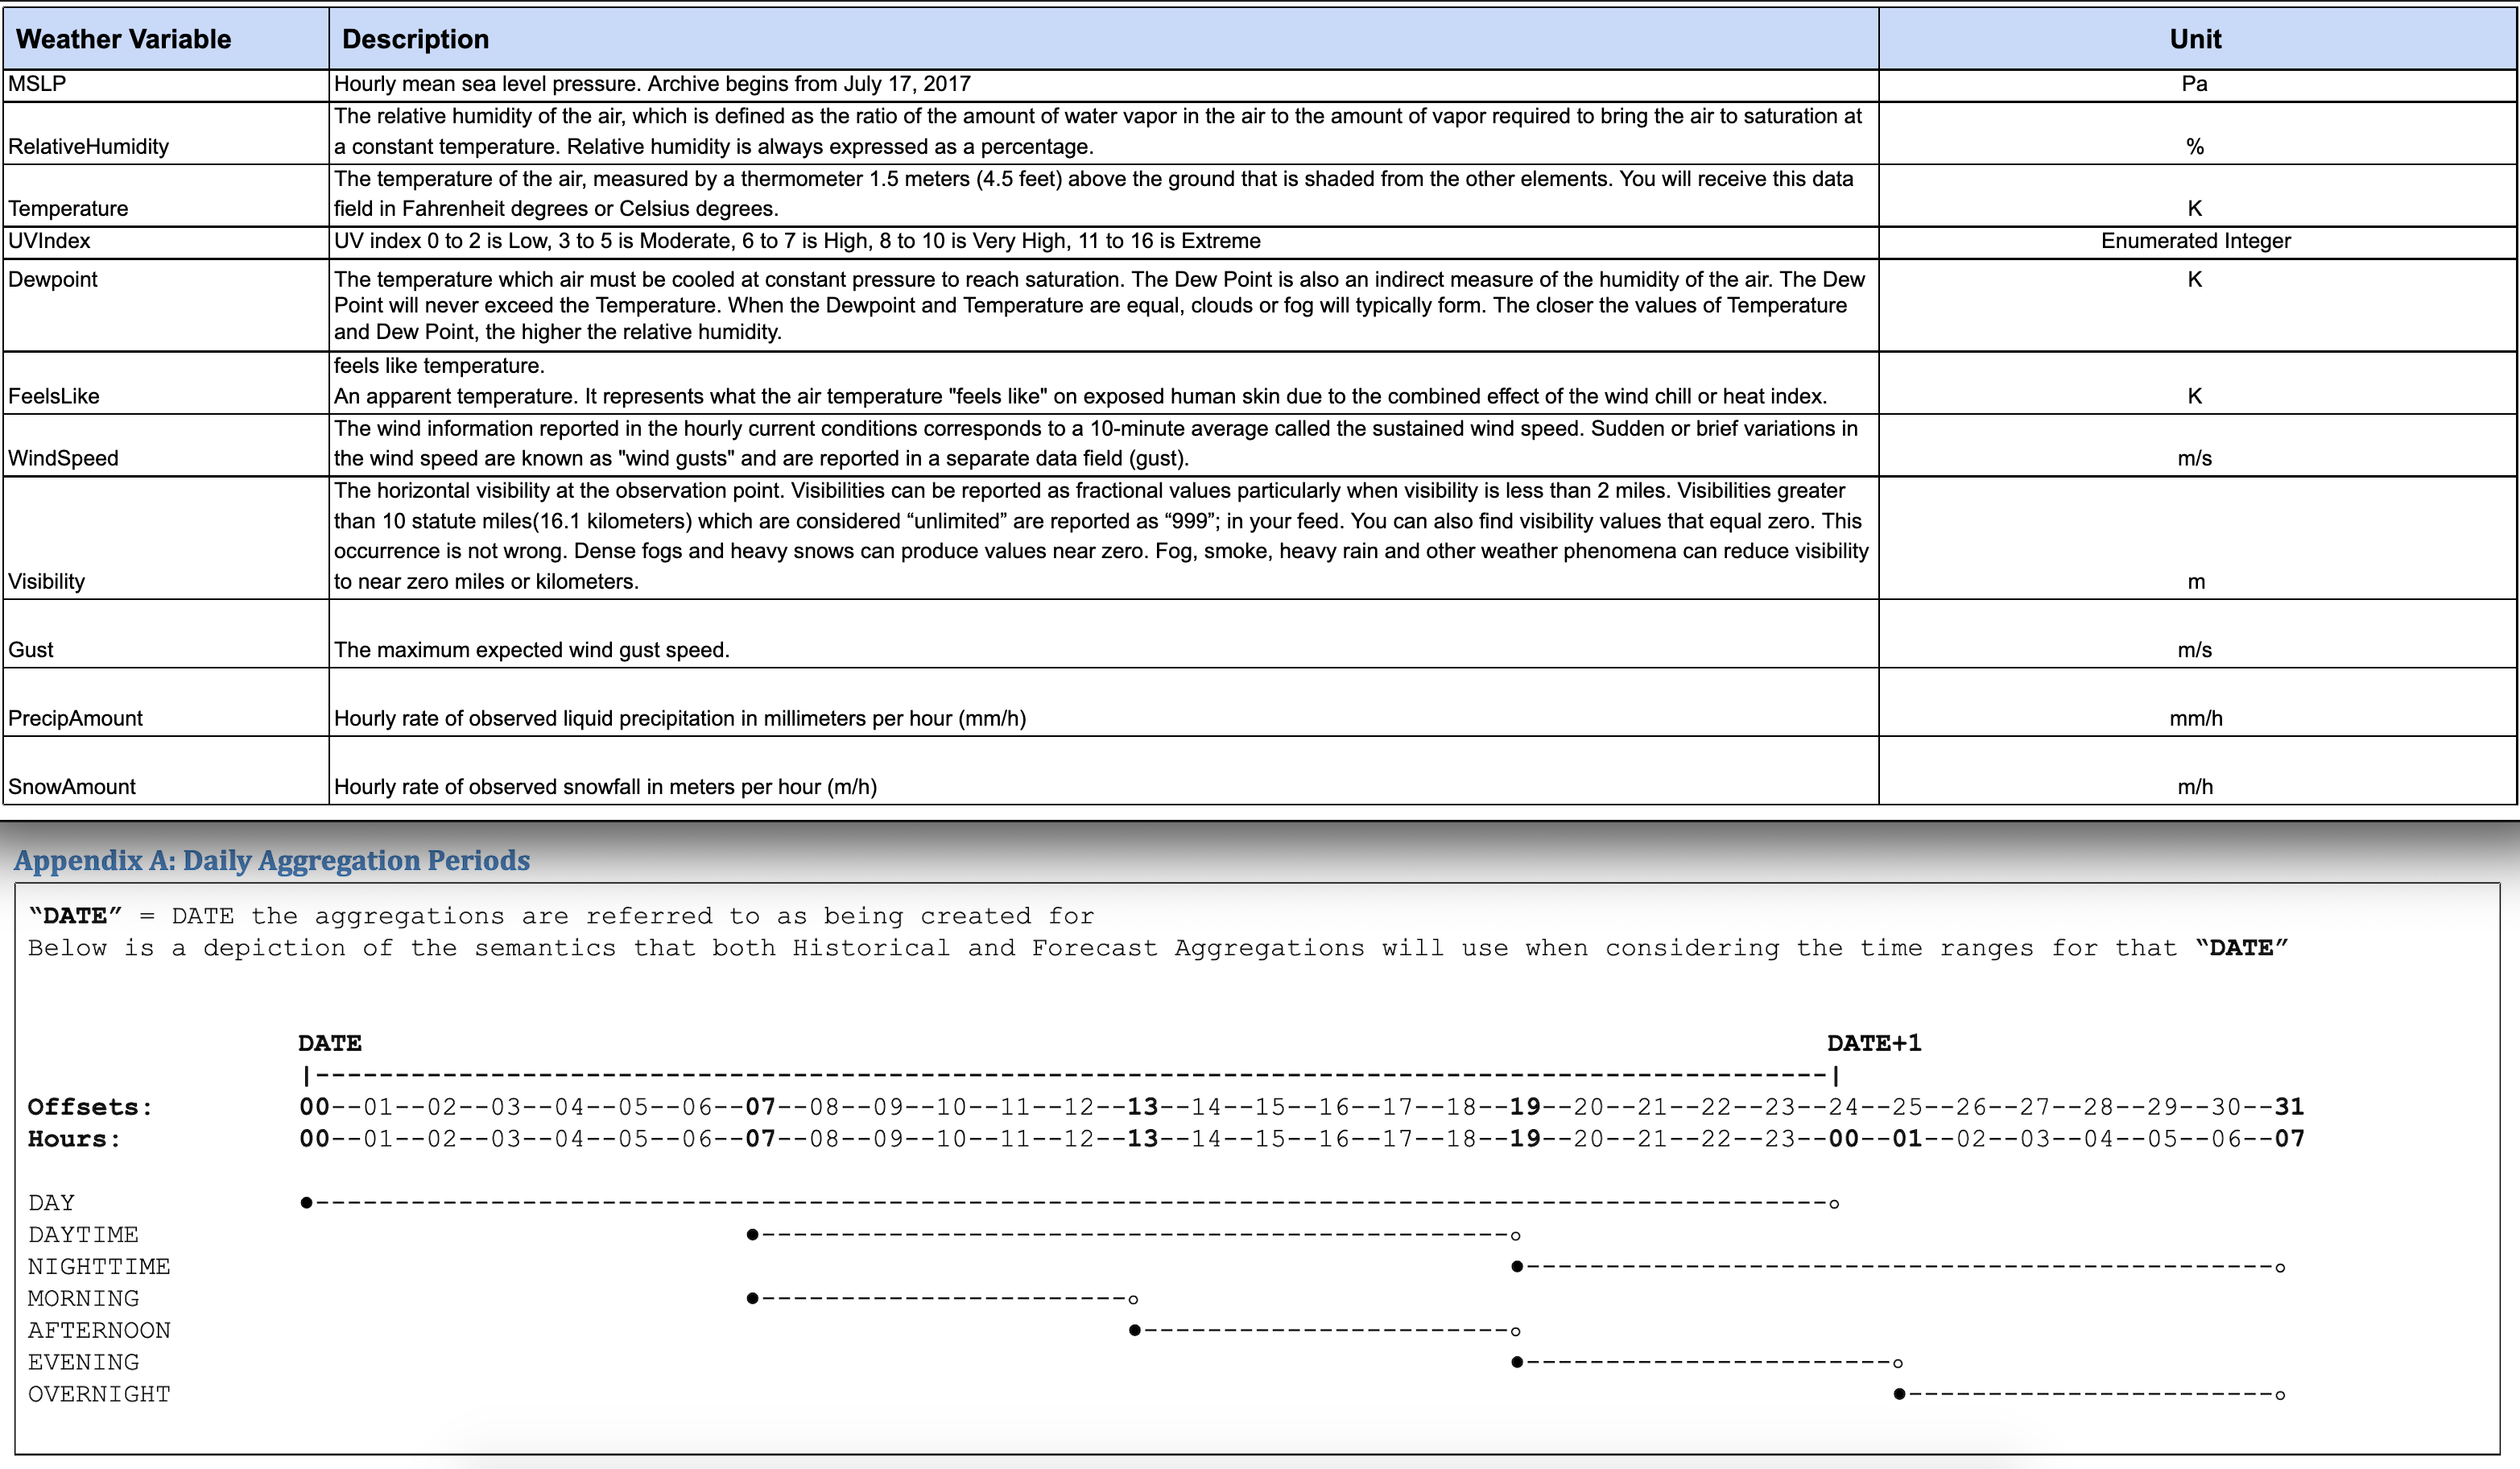

In [1]:
from IPython.display import display, Image
display(Image(filename='/project_data/data_asset/weatherdataSchema.png'))

### STEP 0.1: Configure Analysis: Import Software Packages, Set Parameters, and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (aka "parameters" aka "settings"), and define custom functions).

In [2]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import "sys" library
import sys
import random
import string

# add project data path
if "/project_data/data_asset" not in sys.path:
    sys.path.insert(0, "/project_data/data_asset")

    
# import configuration information
from config import *

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# define data files
loadfile1 = "/project_data/data_asset/fauxsales1.csv"
loadfile2 = "/project_data/data_asset/fauxweather1.csv"

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")
    

DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
DONE: 'STEP 0.1: Configure Analysis' analysis


### STEP 1.1: Evaluate Data
Ideally and Prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [3]:

# ----------------------------------------------------------------------------------------------------------------------
#  EVALUATE DATA
# ----------------------------------------------------------------------------------------------------------------------

#
list_loadfile = [loadfile1, loadfile2]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    df = pd.read_csv(loadfilenow)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                min                max   kurtosis
date         int64    731      2193   0.0          0.0            0.000000      0.0               20160101           20171231          -1.982886 
dateandtime  object   731      2193   0.0          0.0            0.000000     NaN                20160101 00:00:00  20171231 00:00:00 NaN       
placeId      int64    3        2193   0.0          0.0            0.000000      0.0               78152              96468             -1.500685 
placeName    object   3        2193   0.0          0.0            0.000000     NaN                place_078152       place_096468      NaN       
postalcode   int64    3        2193   0.0          0.0            0.000000      0.0               65807              84123             -1.500685 
countrycode  object   1        2193   0.0          0.0            0.000000     NaN                us                 us                NaN       
productname  object   1        2193   0.0          0.0            0.000000     NaN                thingamajig        thingamajig       NaN       
producttype  object   1        2193   0.0          0.0            0.000000     NaN                categoryA          categoryA         NaN       
discount     float64  3        2193   0.0          0.0            0.339717      0.0               0.0                0.2               -1.517852 
closed       bool     2        2193   0.0          0.0            0.989056      0.0               False              True               86.586088
sales        float64  2031     2193   0.0          0.0            0.073871      0.0               0.0                33144.18           2.769503

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative           min           max     kurtosis
DewpointLocalAfternoonAvg          float64  1453     2193   0.0          0.0            0.0           0.011400         -1.563751e+01  7.292249e+01 -0.315214   
DewpointLocalAfternoonMax          float64  397      2193   0.0          0.0            0.0           0.006384         -1.246042e+01  7.411958e+01 -0.365741   
DewpointLocalAfternoonMin          float64  403      2193   0.0          0.0            0.0           0.002280         -1.058652e+01  8.157348e+01 -0.264868   
DewpointLocalDayAvg                float64  1993     2193   0.0          0.0            0.0           0.001368         -2.442216e+00  8.548094e+01 -0.309612   
DewpointLocalDayMax                float64  387      2193   0.0          0.0            0.0           0.004560         -1.381763e+01  7.276237e+01 -0.458122   
DewpointLocalDayMin                float64  419      2193   0.0          0.0            0.0           0.042408         -3.143862e+01  6.918138e+01 -0.122416   
DewpointLocalDaytimeAvg            float64  1772     2193   0.0          0.0            0.0           0.025536         -2.026114e+01  6.741385e+01 -0.331288   
DewpointLocalDaytimeMax            float64  386      2193   0.0          0.0            0.0           0.000912         -4.058771e+00  8.252123e+01 -0.418973   
DewpointLocalDaytimeMin            float64  416      2193   0.0          0.0            0.0           0.152759         -3.743458e+01  5.706542e+01 -0.210670   
DewpointLocalEveningAvg            float64  1469     2193   0.0          0.0            0.0           0.029184         -3.168687e+01  6.812313e+01 -0.255538   
DewpointLocalEveningMax            float64  408      2193   0.0          0.0            0.0           0.008664         -2.326266e+01  7.519734e+01 -0.292875   
DewpointLocalEveningMin            float64  416      2193   0.0          0.0            0.0           0.034200         -3.305257e+01  6.846743e+01 -0.218170   
DewpointLocalMorningAvg            float64  1455     2193   0.0          0.0            0.0           0.012312         -1.781504e+01  7.320496e+01 -0.350819   
DewpointLocalMorningMax            float64  396      2193   0.0          0.0            0.0           0.000912         -3.653143e+00  8.616686e+01 -0.409828   
DewpointLocalMorningMin            float64  410      2193   0.0          0.0            0.0           0.110807         -3.566199e+01  5.937801e+01 -0.289619   
DewpointLocalNighttimeAvg          float64  1811     2193   0.0          0.0            0.0           0.000912         -1.348704e+01  8.741795e+01 -0.269628   
DewpointLocalNighttimeMax          float64  397      2193   0.0          0.0            0.0           0.014136         -2.719290e+01  7.126710e+01 -0.297656   
DewpointLocalNighttimeMin          float64  408      2193   0.0          0.0            0.0           0.010032         -2.543273e+01  7.644727e+01 -0.222983   
DewpointLocalOvernightAvg          float64  1495     2193   0.0          0.0            0.0           0.011400         -2.643458e+01  7.556541e+01 -0.294883   
DewpointLocalOvernightMax          float64  397      2193   0.0          0.0            0.0           0.003648         -2.133171e+01  7.982829e+01 -0.313792   
DewpointLocalOvernightMin          float64  408      2193   0.0          0.0            0.0           0.042408         -3.537960e+01  6.704040e+01 -0.286934   
FeelsLikeLocalAfternoonAvg         float64  1637     2193   0.0          0.0            0.0           0.016416         -2.432087e+01  9.999912e+01 -0.653506   
FeelsLikeLocalAfternoonMax         float64  522      2193   0.0          0.0            0.0           0.010032         -2.113844e+01  1.025216e+02 -0.629623   
FeelsLikeLocalAfternoonMin         float64  537      2193   0.0          0.0            0.0           0.013224         -2.560682e+01  1.054332e+02 -0.665246   
FeelsLikeLocalDayAvg               f

DONE: 'STEP 1.1: Evaluate Data' analysis


### STEP 1.2: Transform Data

Typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables.

In [4]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
df1 = pd.read_csv(loadfile1, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
df2 = pd.read_csv(loadfile2, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


date placeId producttype     placeName postalcode  minute  hour  weekday  day  month  quarter  year  discount     sales       dateW postalcodeW  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  2016-01-01  078152  categoryA   place_078152  65807      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  65807       19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                
1  2016-01-01  094352  categoryA   place_094352  82007      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  82007      -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436               
2  2016-01-01  096468  categoryA   place_096468  84123      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  84123      -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                
3  2016-01-02  078152  categoryA   place_078152  65807      0       0     7        2    1      1        2016  0.1       26100.46  2016-01-02  65807       20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                
4  2016-01-02  094352  categoryA   place_094352  82007      0       0     7        2    1      1        2016  0.2       16744.62  2016-01-02  82007       2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235     

DONE: 'STEP 1.2: Transform Data' analysis


### STEP 1.3: Explore Data

Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etcetera.

In [5]:
# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]

In [6]:
#histogram function

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=int(math.sqrt(valu_numrows)),ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')

    fig.tight_layout()  
    plt.show()


#### STEP 1.3.1: Exploring Numerical Data

The following plots show the frequency distribution of every single weather measure. 

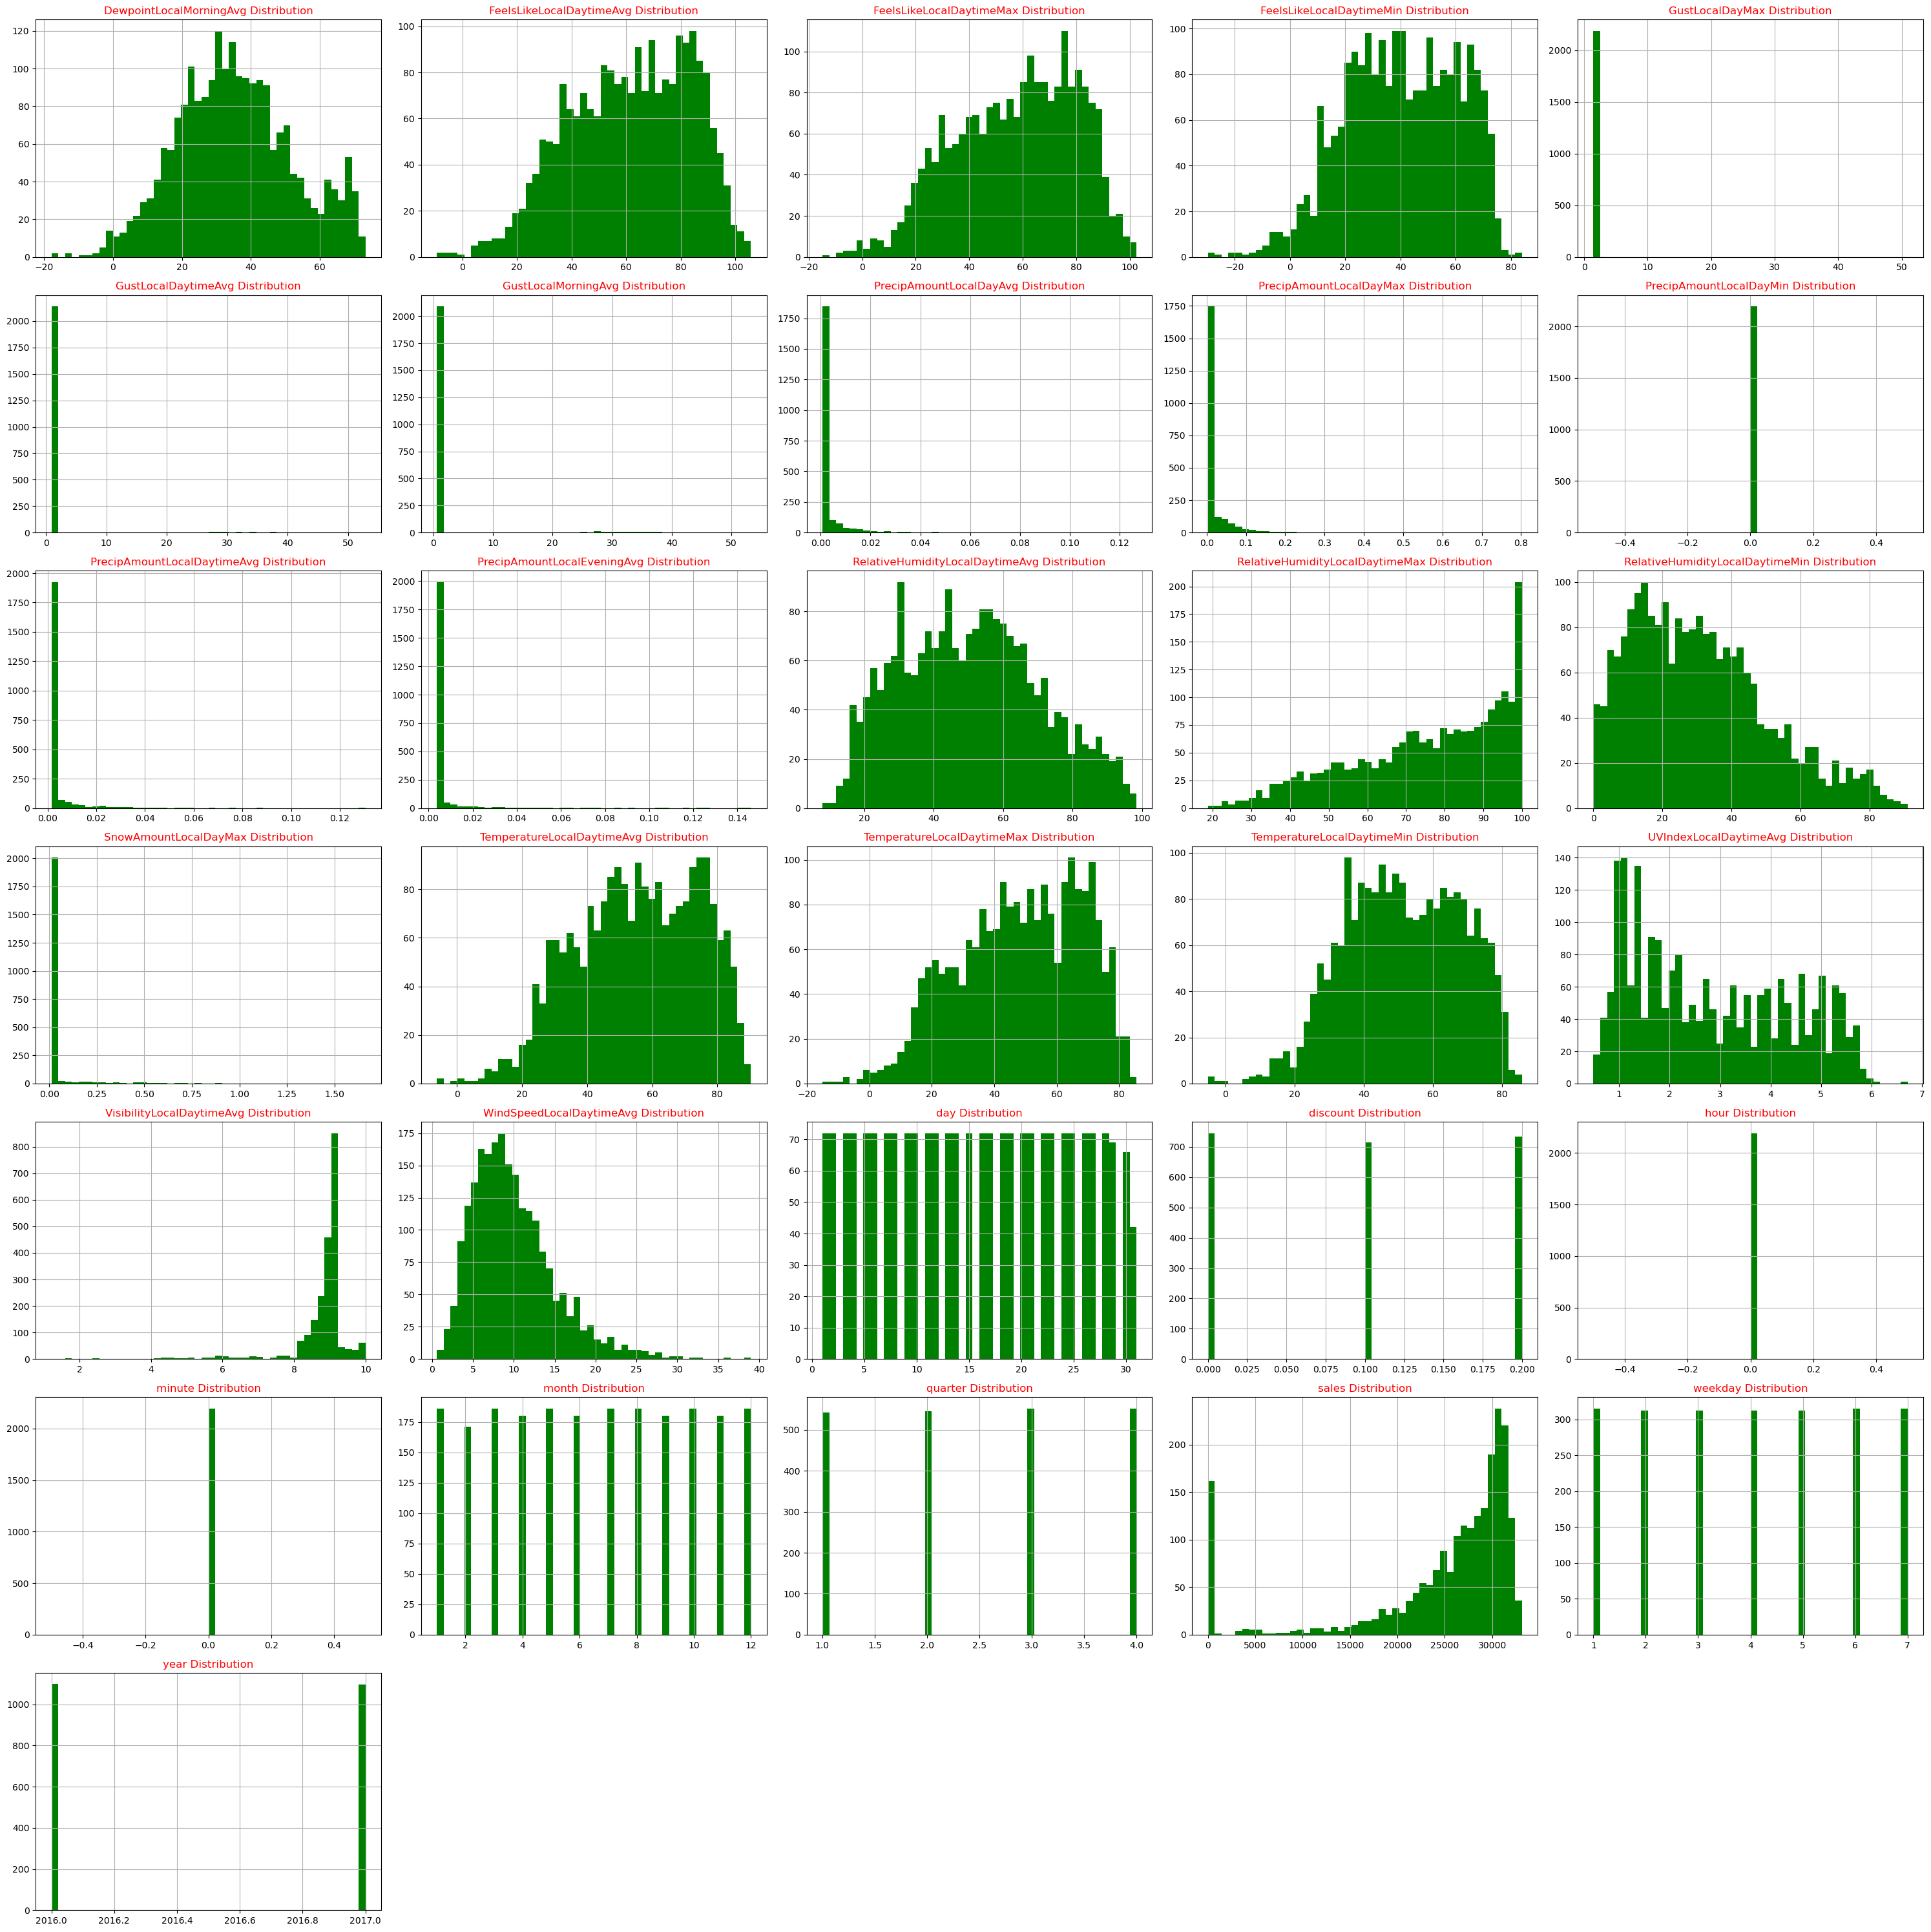

In [7]:
histograms_plot(df,list_columnsnumerical,7,5)

#### STEP 1.3.2 Exploring Categorical Data

Similar frequeny distribution of categorical variables. 

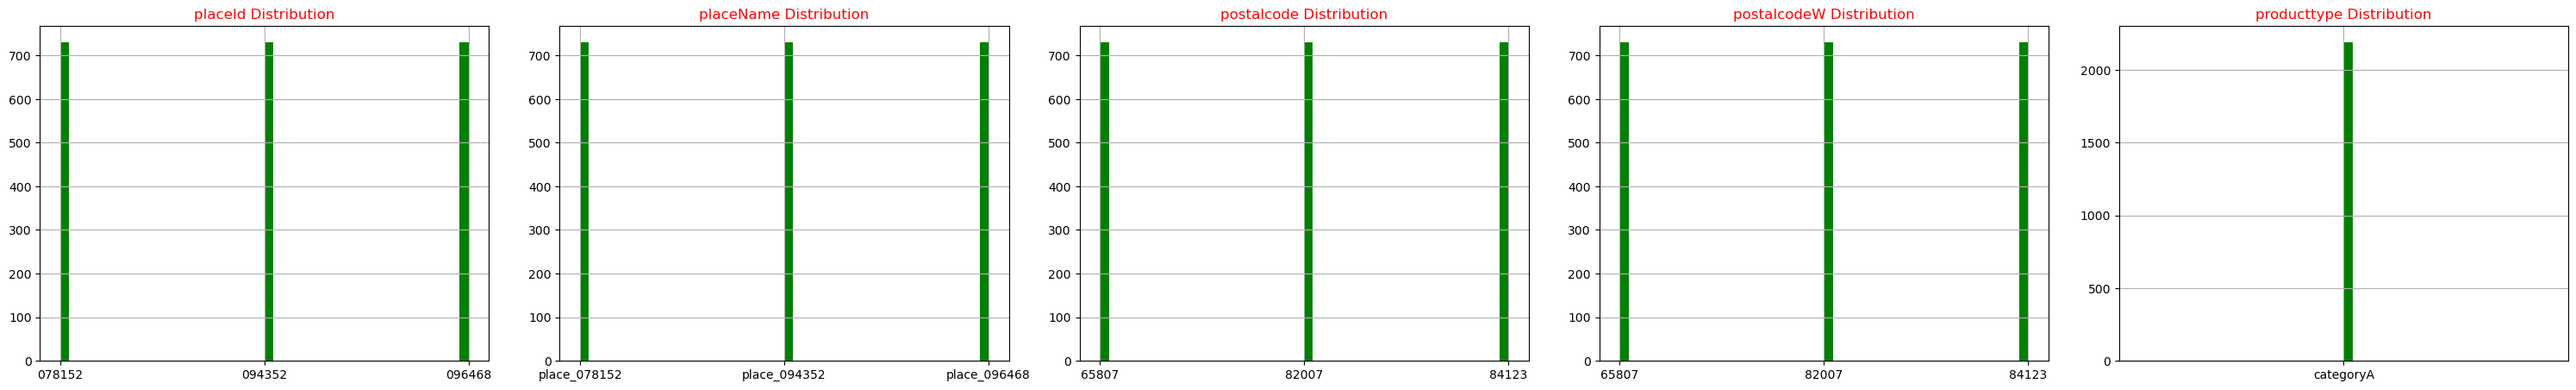

In [8]:
temp_categorical=list_columnscategorical
if 'date' in temp_categorical == True or 'dateW' in temp_categorical:
    temp_categorical.remove('date')
    temp_categorical.remove('dateW')
#removing these as these insights are not giving us any analytical insight 

histograms_plot(df,temp_categorical,7,5)

#### STEP 1.3.3 Exploring relationship between weather variables and sales

In [9]:
#data frame to populate weather and sales data
scatter_df = df[list_colpick_weather + list_columnsother+list_variablesdependent]
scatter_df.head()

DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg  month  weekday  minute  day  hour  quarter  year     sales
0  19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  1      6        0       1    0     1        2016  0.00    
1 -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 1      6        0       1    0     1        2016  0.00    
2 -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  1      6        0       1    0     1        2016  0.00    
3  20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  1      7        0       2    0     1        2016  26100.46
4  2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077                  1      7        0       2    0     1        2016  16744.62

The following plots shows sales trends compared to the weather measure type.

SALES TRENDS RELATED TO WEATHER MEASURES


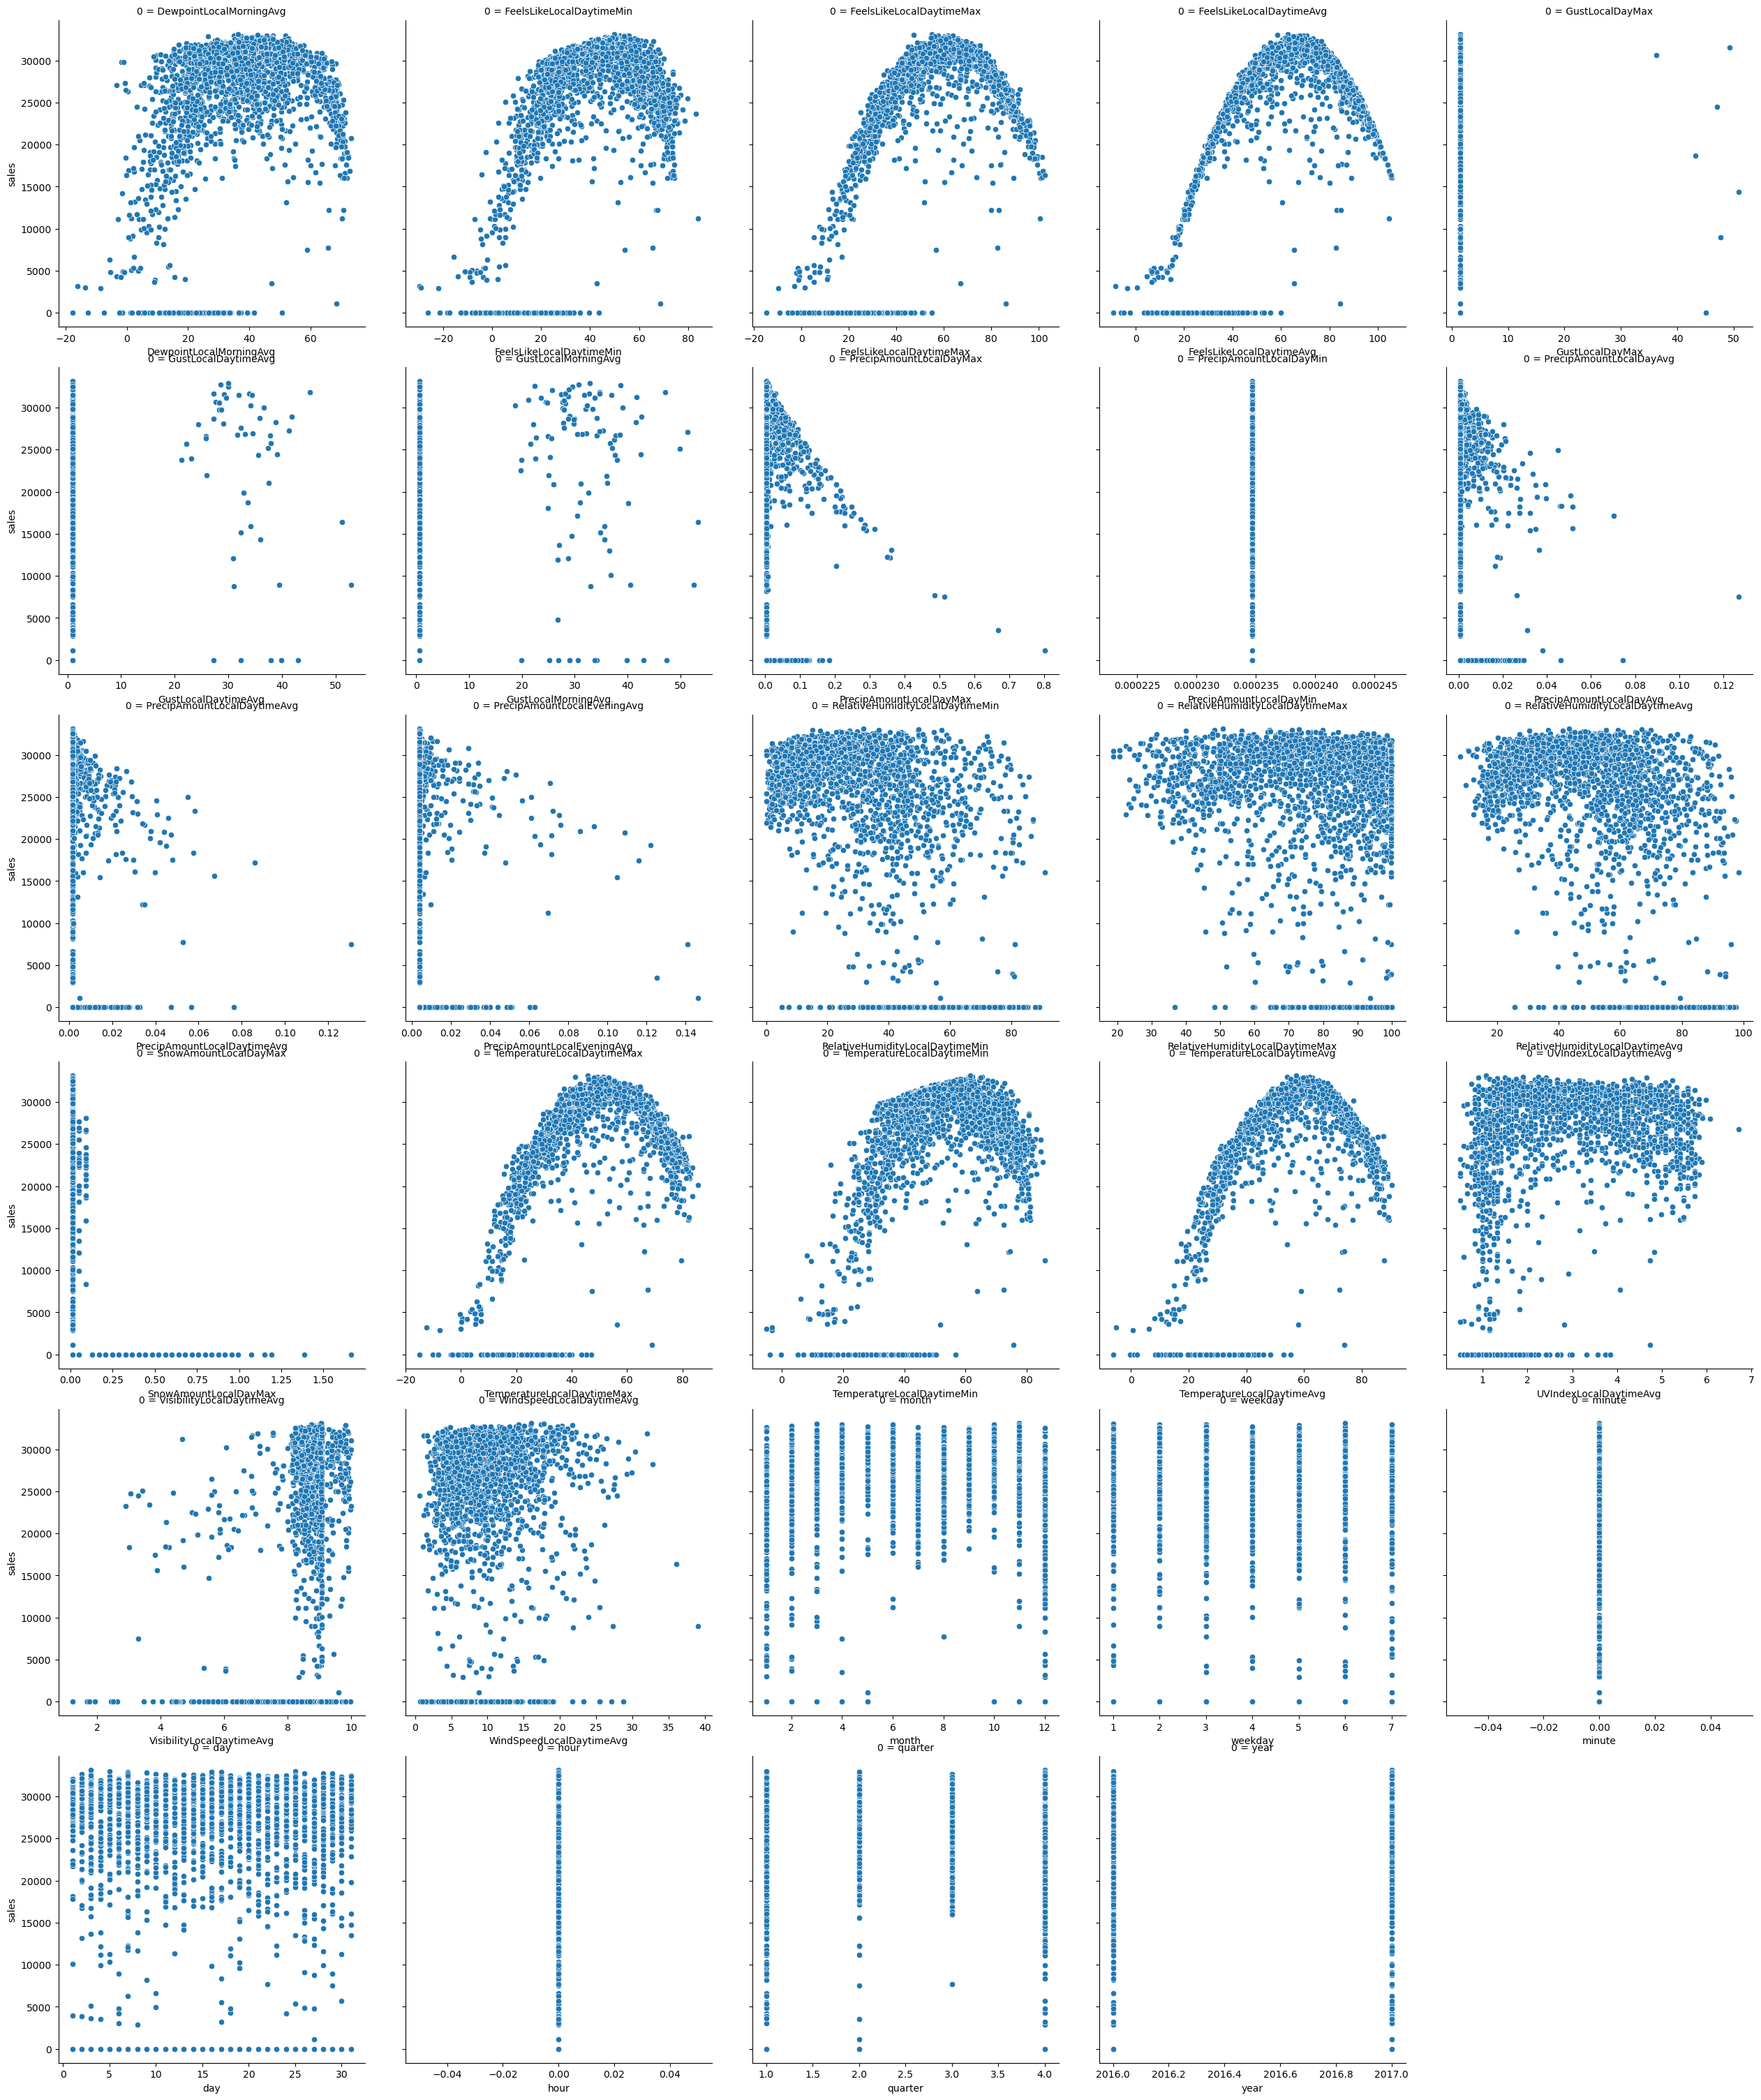

In [10]:
# plotting sales against weather and also temporal variables
print("SALES TRENDS RELATED TO WEATHER MEASURES")
x_column_names=list_colpick_weather + list_columnsother
g = sns.FacetGrid(pd.DataFrame(x_column_names), col=0, col_wrap=5, sharex=False, height = 5)
for ax, xvar in zip(g.axes, x_column_names):
    sns.set_style("darkgrid")
    sns.scatterplot(data=scatter_df, x=xvar, y="sales", ax=ax)
g;

In [11]:

# ----------------------------------------------------------------------------------------------------------------------
# EXPLORATORY ANALYSIS
# ----------------------------------------------------------------------------------------------------------------------

#
dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")


{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['producttype', 'placeId']
(3, 26) [1, 3] 3


producttype placeId  samplesize         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  categoryA   078152  731         26060.644268  46.233637                46.479008                 63.629366                 67.537792                 1.502404         1.313878             1.296265             0.026891                 0.000235                 0.003283                 0.003813                     0.006354                     40.011734                        87.280841                        61.131025                        0.016479               53.138604                   56.630991                   60.303097                   2.937084                8.803182                   9.593702                
1  categoryA   094352  731         23984.502531  26.912347                32.851949                 50.107205                 54.240844                 1.830457         2.606236             3.739698             0.014013                 0.000235                 0.002103                 0.003012                     0.005437                     24.901883                        68.679118                        44.033363                        0.059673               43.101203                   45.885656                   50.298887                   2.793982                8.692582                   12.457979               
2  categoryA   096468  731         24642.982558  33.256174                41.800239                 57.890789                 62.236863                 1.454665         1.181589             1.232021             0.016372                 0.000235                 0.002672                 0.003671                     0.005956                     27.902886                        68.849772                        46.776147                        0.041038               48.744733                   51.858159                   55.819857                   2.705181                8.716538                   7.677944

{'date': 'count', 'placeId': <function <lambda> at 0x7f1c3cc1f400>}
combo columns: ['producttype']
(1, 26) [1] 1


producttype  samplesize                   placeId         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  categoryA   2193        [094352, 096468, 078152]  24896.043119  35.467386                40.377065                 57.20912                  61.3385                   1.595842         1.700568             2.089328             0.019092                 0.000235                 0.002686                 0.003499                     0.005916                     30.938834                        74.936577                        50.646845                        0.039064               48.32818                    51.458269                   55.473947                   2.812082                8.737434                   9.909875

{'date': 'count', 'producttype': <function <lambda> at 0x7f1c3cc1f2e0>}
combo columns: ['placeId']
(3, 26) [3] 3


placeId  samplesize  producttype         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  078152  731         [categoryA]  26060.644268  46.233637                46.479008                 63.629366                 67.537792                 1.502404         1.313878             1.296265             0.026891                 0.000235                 0.003283                 0.003813                     0.006354                     40.011734                        87.280841                        61.131025                        0.016479               53.138604                   56.630991                   60.303097                   2.937084                8.803182                   9.593702                
1  094352  731         [categoryA]  23984.502531  26.912347                32.851949                 50.107205                 54.240844                 1.830457         2.606236             3.739698             0.014013                 0.000235                 0.002103                 0.003012                     0.005437                     24.901883                        68.679118                        44.033363                        0.059673               43.101203                   45.885656                   50.298887                   2.793982                8.692582                   12.457979               
2  096468  731         [categoryA]  24642.982558  33.256174                41.800239                 57.890789                 62.236863                 1.454665         1.181589             1.232021             0.016372                 0.000235                 0.002672                 0.003671                     0.005956                     27.902886                        68.849772                        46.776147                        0.041038               48.744733                   51.858159                   55.819857                   2.705181                8.716538                   7.677944

DONE: 'STEP 1.3: Explore Data' analysis


### STEP 2.1: Build Predictive Models

This step builds machine-learning-based predictive models using the specified algorithms in the *list_mla* configuration and the data computed by the *makedatastrata* function as inputs to the *makemodels* function. The *makedatastrata* function divides the entire original data according to all combinations of the unique values from the variables in the *list_columnsstratby* configuration, thereby computing a list of datasets with each list item is a data strata corresponding to a combination. Changing the *list_mla* configuration parameter facilitates trying different model types. But presently this example builds models using each the following two algorithms with basic arbitrary parameters (rather than optimized parameters for instance via a grid search algorithm) for model estimation (aka tuning aka data fitting).

 1. Linear Support Vector Machine Regressor
 2. Random Forests Regressor

The *makemodels* code splits each stratified dataset into a model training dataset (i.e., ~75% of the sample data) and a model testing dataset (i.e., ~25% of the sample data) to both estimate a model with the training data then evaluate the estimated model with the testing data.  The evaluation analysis encompasses the n-fold crossvalidation technique to tune each model whereby the *num_cvrepeats* configuration specifies the n (number of folds) of the n-fold process. The function also finds the best-performing crossvalidated model per machine-learning algorithm via a score (aka objective function) specified by the *valu_metricpickbestmodel* configuration. The code also displays some model estimation results during computation. Lastly, the *makemodels* function builds each model and returns the process results as a dictionary (*dict_results* in the above function) with the following various content. Each dictionary is an element in a list of all results spanning the combinations of stratified dataset and machine-learning algorithm.

    dict_results["name_data"] is a string identifying the stratified dataset as model input data
    dict_results["variables_independent"] is a list of independent variables in the model input data
    dict_results["variable_dependent"] = is a string naming the dependent variable for model prediction 
    dict_results["datascaler"] = is an object that scales each independent variable of model input data
    dict_results["name_mla"] = is a string naming the machine-learning algorithm that made the model
    dict_results["cvresults_models"] = is a list of crossvalidation results each item a dictionary of model info
    dict_results["cvresults_modelbest"] = is a dictionary of the best crossvalidation result model
    dict_results["cvresults_modelbestscore"] = is a float of the best crossvalidation result model score
    dict_results["cvresults_modelbestindex"] = is a float of the best crossvalidation result model score index

This step builds only six total models (i.e., the first three strata per the two machine-learing algorithms) for demonstrative purposes.

In [12]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE STRATIFIED DATASETS
# ----------------------------------------------------------------------------------------------------------------------

#
ttic = time.time()
datastrata = makedatastrata(df, "demo", list_keepyears_build)
ttoc = time.time()
print("elapsed time of makedatastrata:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE MODELS
# ----------------------------------------------------------------------------------------------------------------------

# compute models
ttic = time.time()
results_modelsbuild = makemodels(datastrata[0:3], list_mla)
ttoc = time.time()
print("elapsed time of makemodels:", ttoc - ttic)



dataset size (dfM): (2193, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0     19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3     20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4     2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077     

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_demo_('078152',); sample size: 731
dataset: clientname_demo_('094352',); sample size: 731
dataset: clientname_demo_('096468',); sample size: 731
elapsed time of makedatastrata: 0.152299165725708
sample size of group clientname_demo_('078152',): 731

dependent variable (aka criterion variable): SALES
any nan: False ;  all finite: True
any nan: False ;  all finite: True
mla: SVR

{'fit_time': array([0.03588796, 0.03553343, 0.06913877, 0.02146959, 0.10605431]), 'score_time': array([0.00141859, 0.00140166, 0.00133872, 0.00227308, 0.00142598]), 'estimator': [SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear')], 'test_neg_mean_absolute_error': array([-2702.26283434, -3947.76864781, -3916.91658674, -2473.2391418 ,

{'fit_time': array([0.13684916, 0.08521414, 0.10699224, 0.08166146, 0.10992575]), 'score_time': array([0.00170588, 0.00158954, 0.00142908, 0.00179148, 0.00150299]), 'estimator': [SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear')], 'test_neg_mean_absolute_error': array([-3536.21835372, -3824.03936539, -3544.58721438, -4292.72379258,
       -3778.94701618]), 'train_neg_mean_absolute_error': array([-2844.62630058, -2936.52785266, -2937.19849102, -2832.8063514 ,
       -2829.17141136]), 'test_neg_median_absolute_error': array([-2317.46786559, -1905.18616438, -1912.91716376, -3197.18780525,
       -1929.42922318]), 'train_neg_median_absolute_error': array([-1868.50391356, -1708.47857609, -1695.14683335, -1721.84586666,
       -1514.36730555]), 'test_explained_variance': array([0.39653747, 0.5460509 , 0.6072265 , 0.66515357, 0.712

{'fit_time': array([0.20301676, 0.10803175, 0.09565592, 0.09987855, 0.1133852 ]), 'score_time': array([0.00165653, 0.00154543, 0.00187182, 0.00163054, 0.00157475]), 'estimator': [SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear'), SVR(C=100, gamma='auto', kernel='linear')], 'test_neg_mean_absolute_error': array([-2663.61429505, -4374.17419831, -5743.20253781, -4020.45090582,
       -2961.36589774]), 'train_neg_mean_absolute_error': array([-3629.60940004, -3343.7563691 , -2825.95319149, -3393.33093232,
       -3598.76009909]), 'test_neg_median_absolute_error': array([-1467.3936043 , -1149.37032582, -2908.18783127, -2011.74968406,
       -1735.58005631]), 'train_neg_median_absolute_error': array([-1343.13746124, -1368.22618491, -1340.74573489, -1429.01747989,
       -1400.1799389 ]), 'test_explained_variance': array([ 0.60670184,  0.50549304,  0.14878511, -0.15658807,  

clientname_demo_('078152',) sales SVR 1750.941088653335


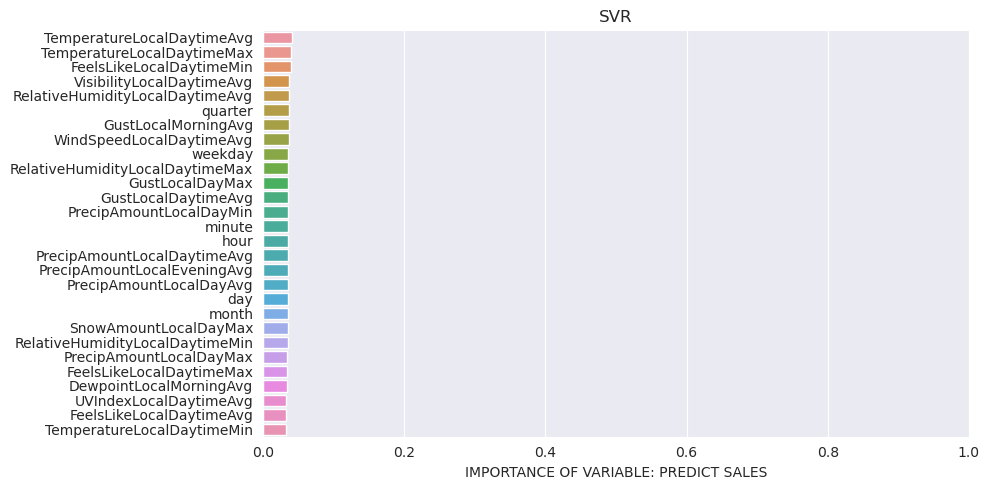

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 2956.028203302577, 'mape': inf, 'rms': 4622.804766857373, 'mse': 21370323.912479244, 'vs': 0.3882867335362197, 'r2': 0.36519739770069537}


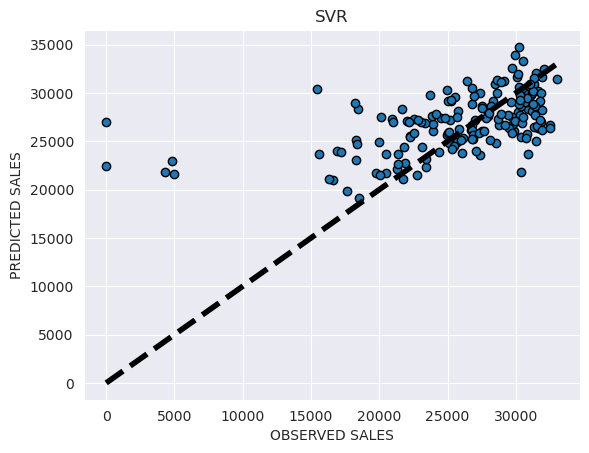

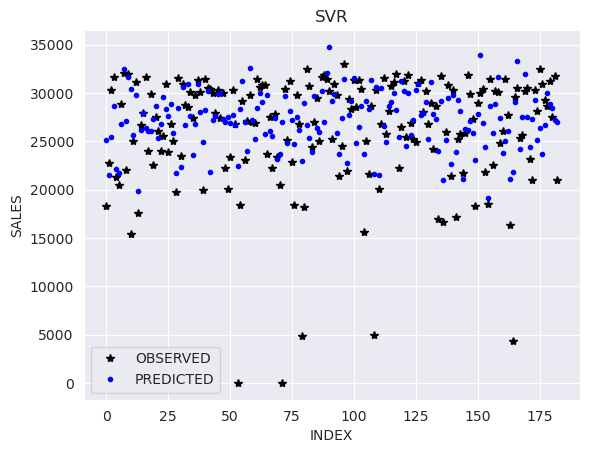

permuted neg_median_absolute_error: -2401.571564158531 (p = 0.09090909090909091, n = 10)


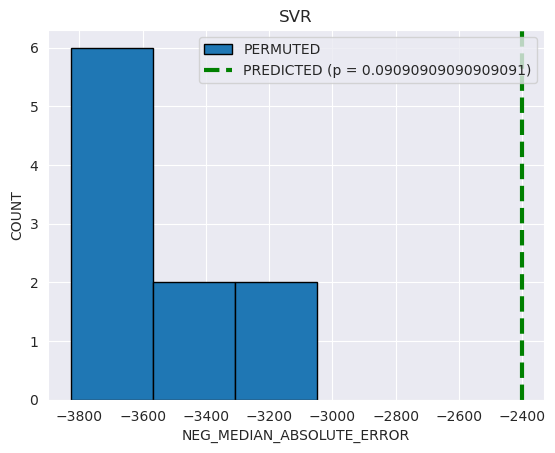

clientname_demo_('078152',) sales RANDOMFOREST 640.4049999999952


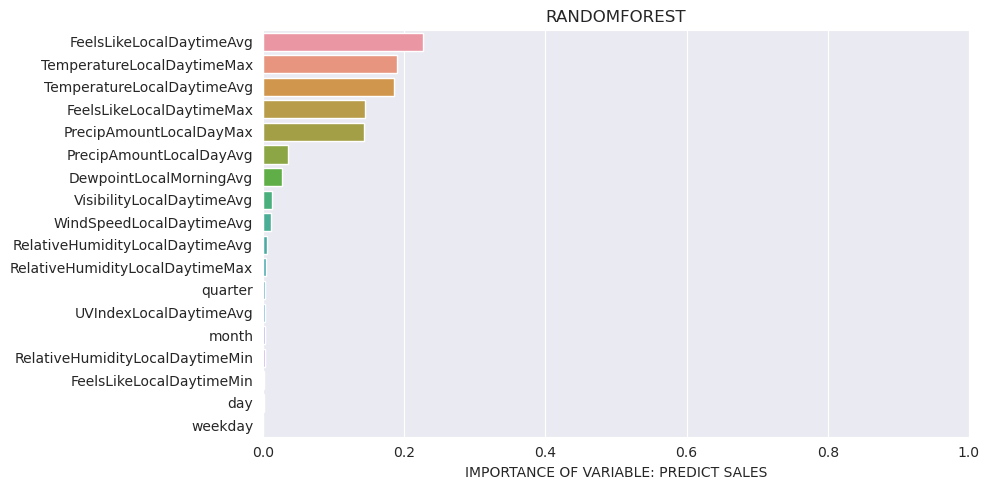

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 942.1626320582881, 'mape': inf, 'rms': 1838.3190866319023, 'mse': 3379417.0642751516, 'vs': 0.901236776170302, 'r2': 0.8996148698801981}


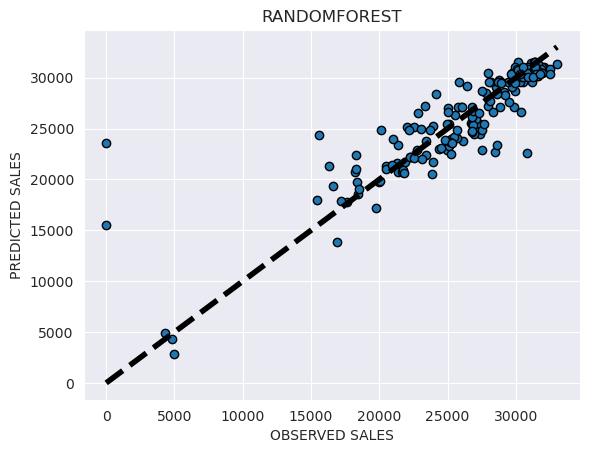

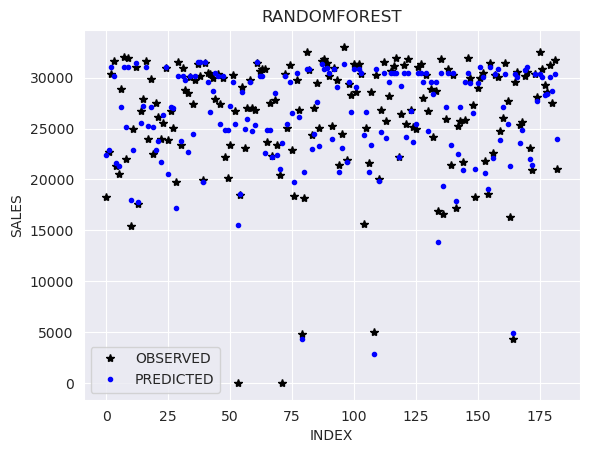

permuted neg_median_absolute_error: -796.9836666666666 (p = 0.09090909090909091, n = 10)


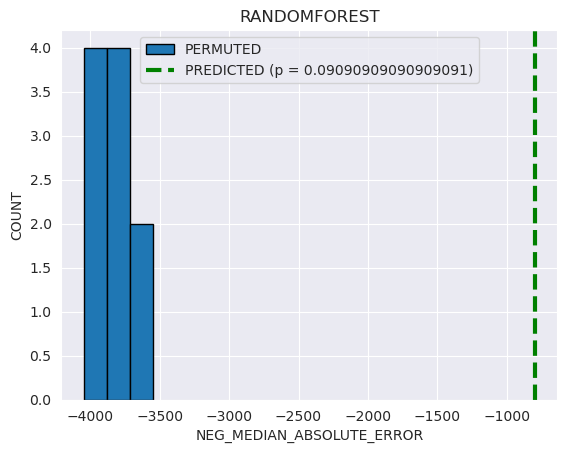

clientname_demo_('094352',) sales SVR 1905.1861643781704


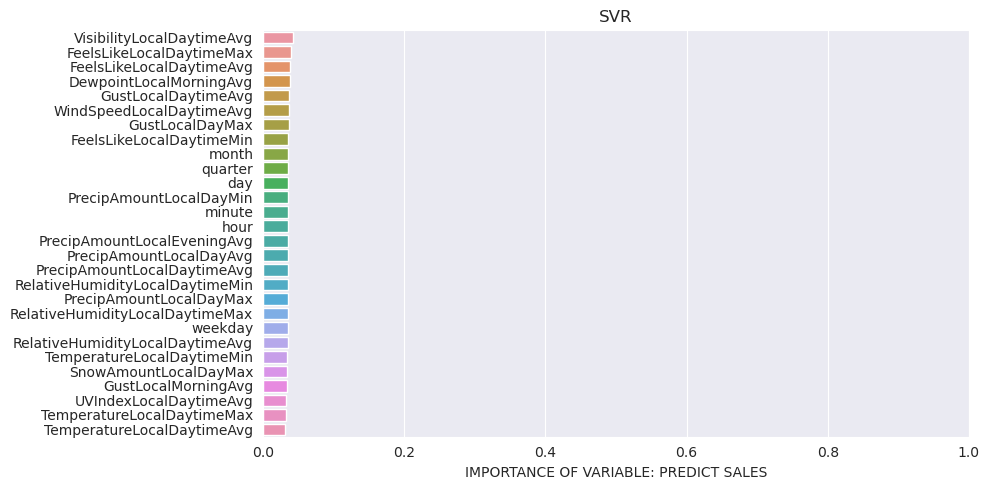

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3115.97007107864, 'mape': inf, 'rms': 5225.311612102324, 'mse': 27303881.443571392, 'vs': 0.696281510075464, 'r2': 0.6962070348496053}


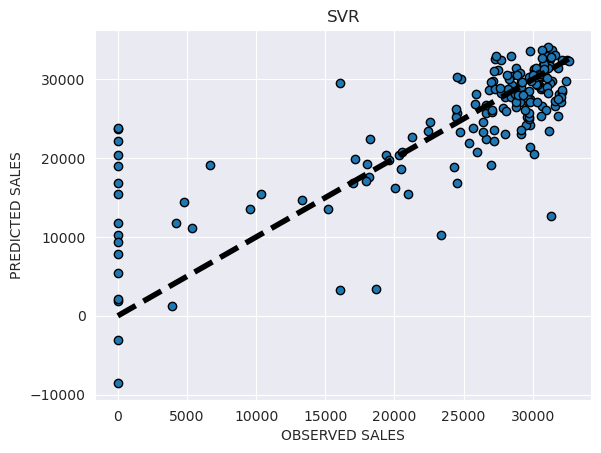

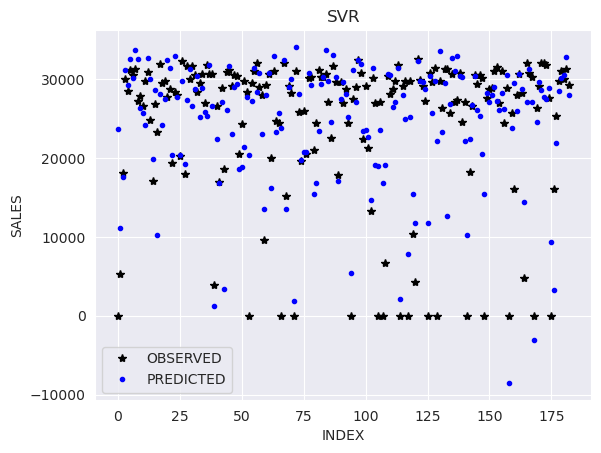

permuted neg_median_absolute_error: -2252.437644431936 (p = 0.09090909090909091, n = 10)


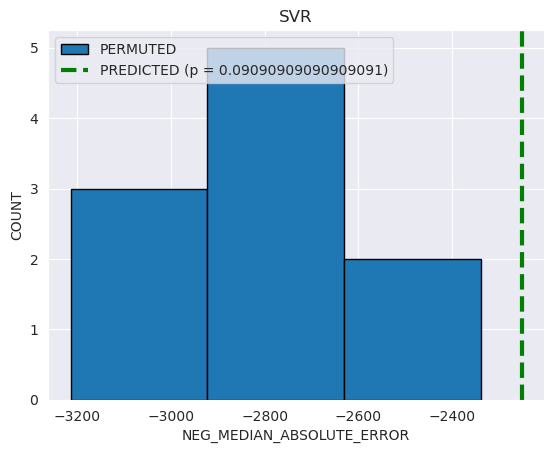

clientname_demo_('094352',) sales RANDOMFOREST 611.4174999999996


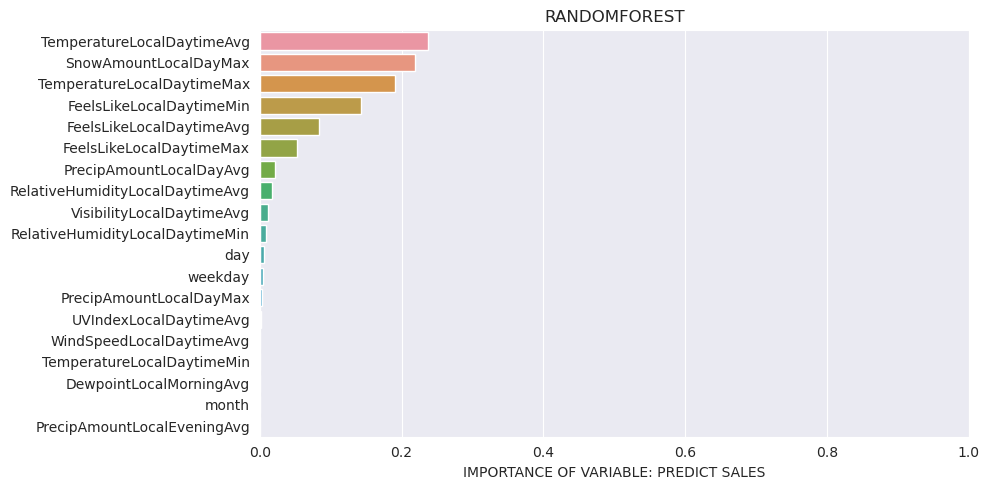

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 874.0174590163933, 'mape': nan, 'rms': 1954.7723985090627, 'mse': 3821135.1299728737, 'vs': 0.9584439223460559, 'r2': 0.9574846538293876}


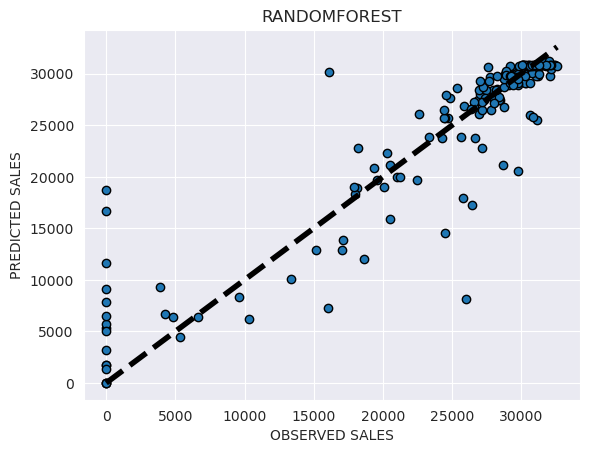

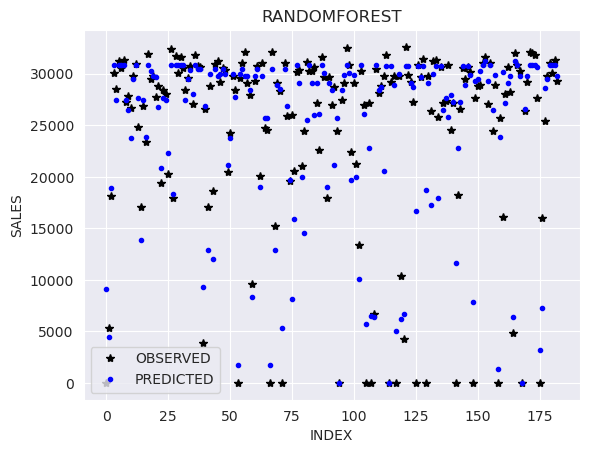

permuted neg_median_absolute_error: -839.6193333333337 (p = 0.09090909090909091, n = 10)


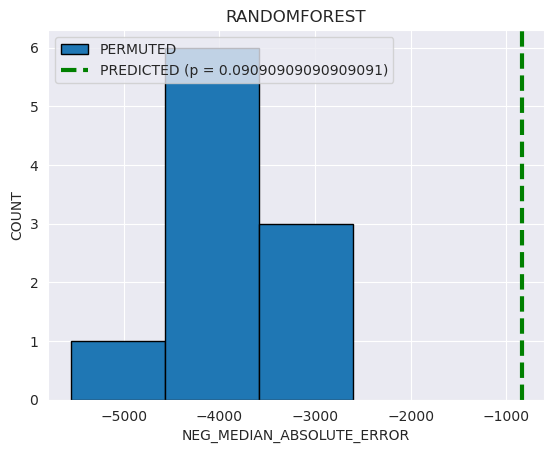

clientname_demo_('096468',) sales SVR 1149.3703258203313


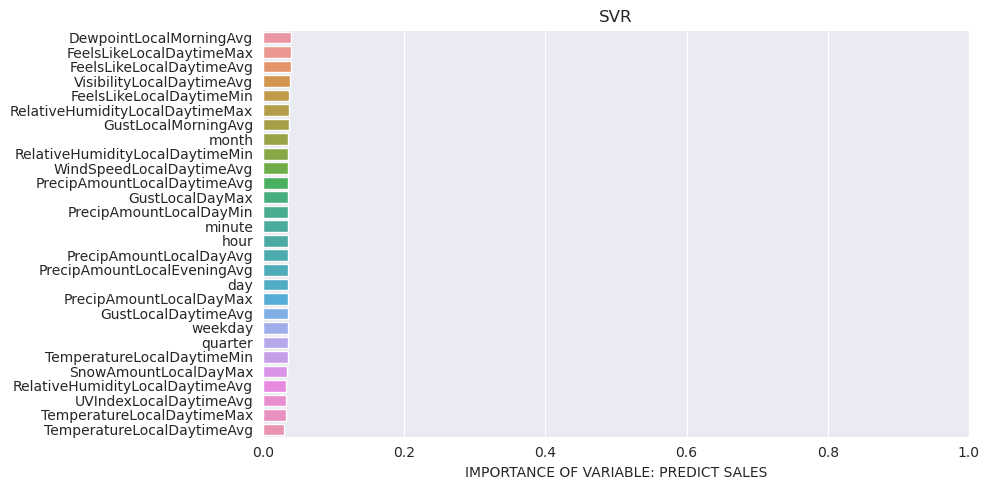

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 3552.092214353684, 'mape': inf, 'rms': 7169.839265332644, 'mse': 51406595.090705745, 'vs': 0.3729479632780949, 'r2': 0.30085565325424357}


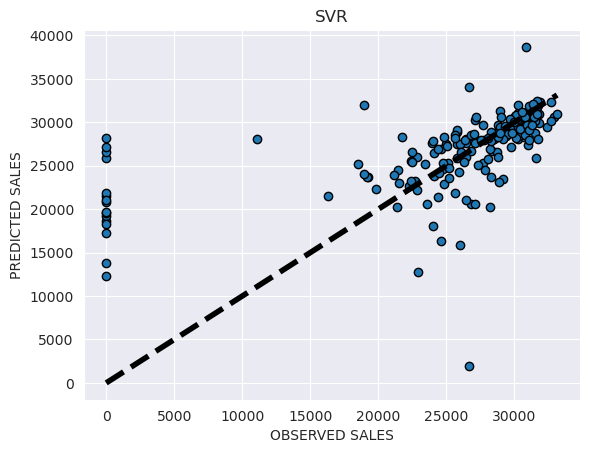

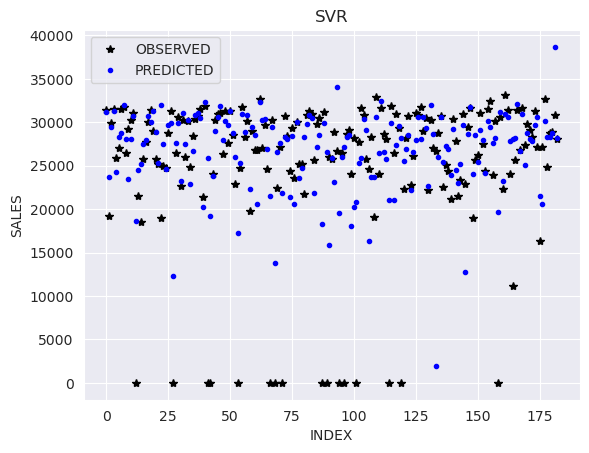

permuted neg_median_absolute_error: -1854.4563003513758 (p = 0.09090909090909091, n = 10)


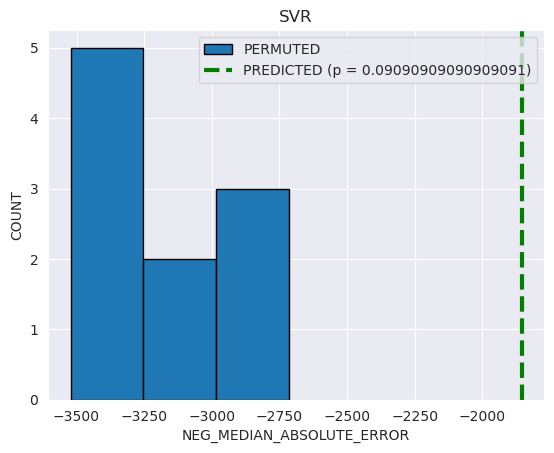

clientname_demo_('096468',) sales RANDOMFOREST 580.5316666666695


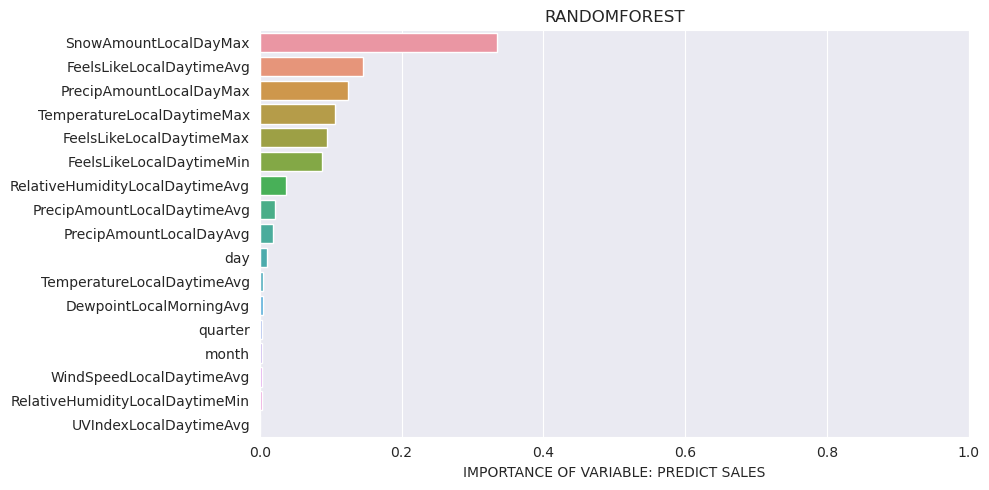

any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 799.3547267759561, 'mape': nan, 'rms': 1528.7014325946664, 'mse': 2336928.0700169853, 'vs': 0.9682777465162624, 'r2': 0.9682171121035938}


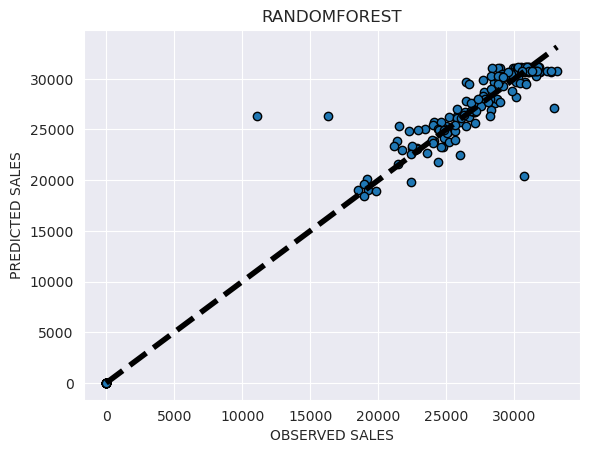

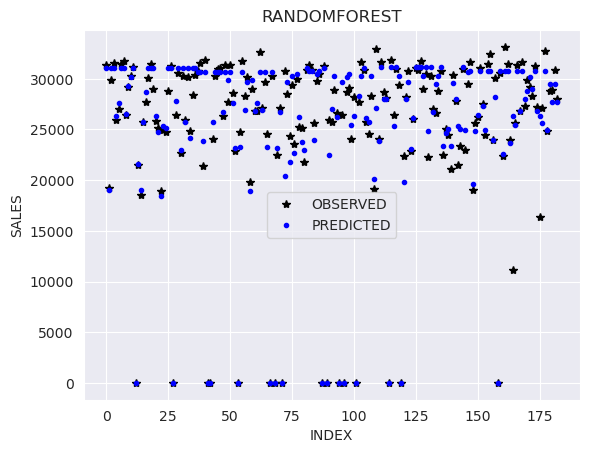

permuted neg_median_absolute_error: -622.7598333333335 (p = 0.09090909090909091, n = 10)


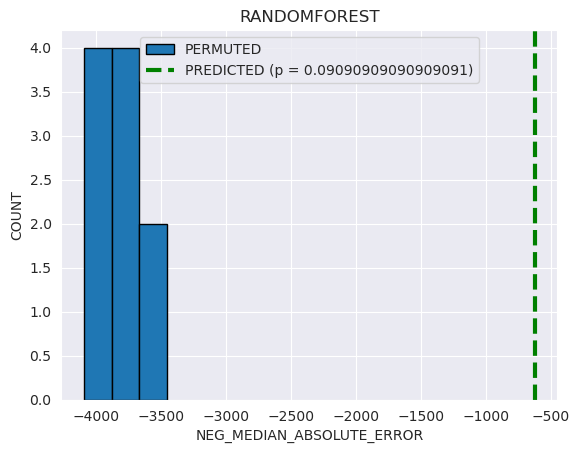

DONE: EVALMODELS_BUILD!
elapsed time of evalmodels_build: 30.1137912273407
DONE: 'STEP 2.1: Build Predictive Models' Work


In [13]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE "MODEL EVALUATION" RESULTS
# ----------------------------------------------------------------------------------------------------------------------

# compute related plots
ttic = time.time()
results_evaluatebuild = evalmodels_build(datastrata[0:3], results_modelsbuild)
ttoc = time.time()
print("elapsed time of evalmodels_build:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models' Work")


In [14]:
# ----------------------------------------------------------------------------------------------------------------------
# DISPLAY "MODEL EVALUATION" RESULTS
# ----------------------------------------------------------------------------------------------------------------------

# #
# savefile = "/project_data/data_asset/buildmodels_performances.csv"

#
list_columnsfirst = ["namedata", "vardependent", "namemla"]

#
dfP = pd.DataFrame({})

for ii in results_modelsbuild:
    dfTemp = pd.DataFrame(ii["cvresults_models"])
    dfTemp["namedata"] = ii["name_data"]
    dfTemp["namemla"] = ii["name_mla"]
    dfTemp["vardependent"] = ii["variable_dependent"]
    dfP = pd.concat([dfP, dfTemp], axis=0)
    
dfP = dfP.loc[:, list_columnsfirst + list(set(dfP.columns) - set(list_columnsfirst))]

# confirm table
mydfdescribe(dfP)
display(dfP)
dfP.shape

# # save table
# dfP.to_csv(savefile, sep=",", header=True, index=False)



dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative  \
namedata                         object   3.0      30     0.0          0.0            0.0          NaN                 
vardependent                     object   1.0      30     0.0          0.0            0.0          NaN                 
namemla                          object   2.0      30     0.0          0.0            0.0          NaN                 
estimator                        object   30.0     30     0.0          0.0            0.0          NaN                 
fit_time                         float64  30.0     30     0.0          0.0            0.0           0.000000           
train_neg_median_absolute_error  float64  30.0     30     0.0          0.0            0.0           1.000000           
variables_importances            object  NaN       30     0.0          0.0            0.0          NaN                 
test_explained_variance          float64  30.0     30     0.0          0.0            0.0           0.033333           
test_r2                          float64  30.0     30     0.0          0.0            0.0           0.033333           
train_r2                         float64  30.0     30     0.0          0.0            0.0           0.000000           
test_neg_mean_absolute_error     float64  30.0     30     0.0          0.0            0.0           1.000000           
test_neg_median_absolute_error   float64  30.0     30     0.0          0.0            0.0           1.000000           
train_explained_variance         float64  30.0     30     0.0          0.0            0.0           0.000000           
score_time                       float64  30.0     30     0.0          0.0            0.0           0.000000           
train_neg_mean_absolute_error    float64  30.0     30     0.0          0.0            0.0           1.000000           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          min  \
namedata                         clientname_demo_('078152',)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

namedata vardependent       namemla                                                                                                                                                                                                                                                                                                                                                                                            estimator  fit_time  train_neg_median_absolute_error  \
0  clientname_demo_('078152',)  sales        SVR           SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                                                            0.035888 -2138.992426                       
1  clientname_demo_('078152',)  sales        SVR           SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                                                            0.035533 -1859.867348                       
2  clientname_demo_('078152',)  sales        SVR           SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                                                            0.069139 -1761.823609                       
3  clientname_demo_('078152',)  sales        SVR           SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                                                            0.021470 -2111.812142                       
4  clientname_demo_('078152',)  sales        SVR           SVR(C=100, gamma='auto', kernel='linear')                                                                                                                                                                                                                                                                                                                                                            0.106054 -2135.923215                       
0  clientname_demo_('078152',)  sales        RANDOMFOREST  (DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=189207374), DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=1084116425), DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=1043367549))   0.011159 -575.520000                        
1  clientname_demo_('078152',)  sales        RANDOMFOREST  (DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=55054050), DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=1533051118), DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=20,\n                      random_state=633471958))     0.018600 -557.470833                        
2  clientname_demo_('078152',)  sales        RANDOMFOREST  (DecisionTreeRegres

(30, 15)

array([<Axes: title={'center': 'test_neg_mean_absolute_error'}, xlabel='namemla'>,
       <Axes: title={'center': 'train_neg_mean_absolute_error'}, xlabel='namemla'>],
      dtype=object)

DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work


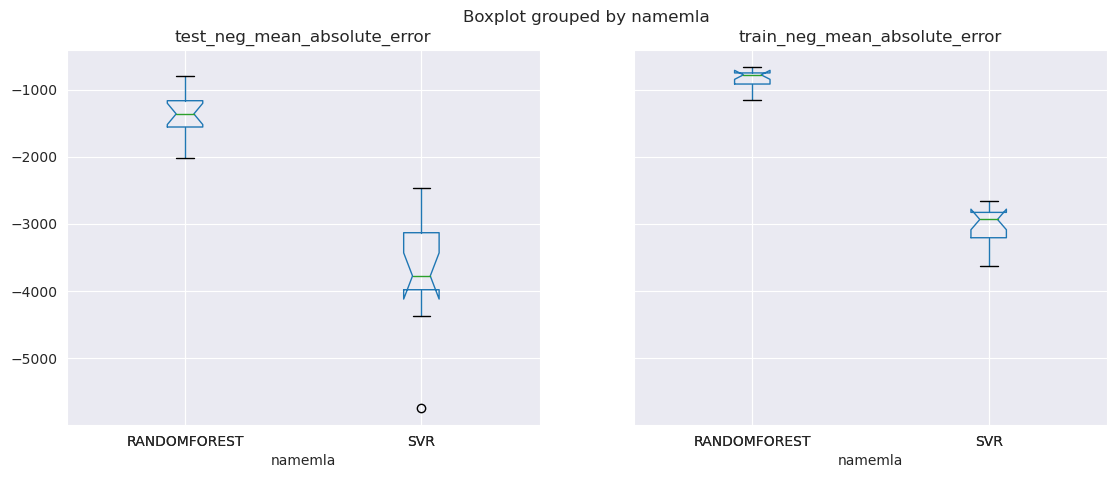

In [15]:
# ----------------------------------------------------------------------------------------------------------------------
# Comparison of Mean absolute error between Random Forest and SVM
# ----------------------------------------------------------------------------------------------------------------------

list_plotmetrics = ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]

dfP.boxplot(column=list_plotmetrics, by="namemla", notch=True, figsize=(13,5))

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models then Examine Predictive Build Model Performance' Work")


### STEP 2.2: Save Predictive Models

This step saves the best predictive models of STEP 2.1 to IBM CP4D (IBM Cloud Pak for Data) platform for both archived results and prospective deployed operationalization. The completion of this step entails the creation of a deployment workspace (space). WML (Watson Machine Learning) provides deployment spaces to save, configure, and deploy computed predictive models. Additionally, the workspace permits the saving of code assets and data assets as well as models. The following bullets and corresponding cells involve saving then deploying models by leveraging the *watson_machine_learning_client* package to complete this STEP 2.2 process.

 1. Use the predefined workspace-related configuration file values to create the deployment space.
 2. Create the deployment space.
 3. Store the models and their details in the space.
 4. Deploy the models for future operationalized use (e.g., see the *applypredictivemodelsScikitlearn* notebook) in the space.
 5. Store the "model data scaler" info from the earlier "build models" process as a *data_asset* file.


### Create the Deployment Space

Create a new deployment space using name of the space as specified in the user inputs cell above. Model and its deployment will be stored in the deployment space. The deployment space can be created programmatically using `ibm-watson-machine-learning` client. <br>
If a space with specified space_name already exists, user can either use the existing space by specifying `use_existing_space=True` or delete the existing space and create a new one by specifying `use_existing_space=False` below. By default `use_existing_space` is set to `True`.

In [16]:
use_existing_space=True

# ----------------------------------------------------------------------------------------------------------------------
# CREATE THE DEPLOYMENT SPACE
# ----------------------------------------------------------------------------------------------------------------------

# create the WML api client

client = APIClient(wml_credentials)

space_uid=""
for space in client.spaces.get_details()['resources']:

    if space['entity']['name'] ==space_name:
        print("Deployment space with ",space_name,"already exists . .")
        space_uid=space['metadata']['id']
        client.set.default_space(space_uid)
        if(use_existing_space==False):

            for deployment in client.deployments.get_details()['resources']:
                print("Deleting deployment",deployment['entity']['name'], "in the space",)
                deployment_id=deployment['metadata']['id']
                client.deployments.delete(deployment_id)
            print("Deleting Space ",space_name,)
            client.spaces.delete(space_uid)
            time.sleep(10)
        else:
            print("Using the existing space")
            
            
if (space_uid=="" or use_existing_space==False):
    print("\nCreating a new deployment space -",space_name)
    # create the space and set it as default
    space_meta_data = {
        client.spaces.ConfigurationMetaNames.NAME : space_name

        }

    stored_space_details = client.spaces.store(space_meta_data)

    space_uid = stored_space_details['metadata']['id']

    client.set.default_space(space_uid)


Creating a new deployment space - wxsignals_clientname
Space has been created. However some background setup activities might still be on-going. Check for 'status' field in the response. It has to show 'active' before space can be used. If it's not 'active', you can monitor the state with a call to spaces.get_details(space_id). Alternatively, use background_mode=False when calling client.spaces.store().


'SUCCESS'

### Store the Models then Deploy the Models

Store the models in the deployment space repository, specifying a name per model via its model storage metadata.
Software specification for the model is specified in the model metadata. <br>
The Software Specification refers to the runtime used in the Notebook, WML training and WML deployment. We use the software specification `runtime-22.2-py3.10` to store the models. We get the ID of the software specification and include it in the metadata when storing the model.  Available Software specifications can be retrieved using `client.software_specifications.list()`. 

In [17]:
# ----------------------------------------------------------------------------------------------------------------------
# STORE MODELS THEN DEPLOY MODELS
# ----------------------------------------------------------------------------------------------------------------------

#
results_modelsbuild_onemla = [ii for ii in results_modelsbuild if (ii["name_mla"].lower() == "randomforest")]

#
dict_modeldatascaler = {}

sw_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")

#
for results_modelnow in results_modelsbuild_onemla:
        
    # make model nameid
    model_nameid = "{}_{}".format(results_modelnow["name_data"], results_modelnow["name_mla"])
    
    # make model nameidtag
    model_nameidtag = model_nameid.replace("_store", "").replace("_deploy", "").replace("(", "").replace(")", "").replace(",", "-").replace("'", "")
    
    # get model
    model = results_modelnow["cvresults_modelbest"]["estimator"]
    
    # get model data scaler
    modeldatascaler = results_modelnow["datascaler"]
    dict_modeldatascaler[model_nameid] = modeldatascaler

    # get independent variables list
    list_variablesindependent = results_modelnow["variables_independent"]
    
    # ----------------------------------------------------------------------------------------------------------------------
    # STORE MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Storing Model {}: name as {}; nametag as {}".format(model_nameid, model_nameid, model_nameidtag + "_store"))

    # make store model metadata
   
    

    metadata_modelstore = {
        client.repository.ModelMetaNames.NAME: model_nameid,
        client.repository.ModelMetaNames.TYPE: "scikit-learn_1.1",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid 
    }
    
    # store the model
    modelstored = client.repository.store_model(model=model, meta_props=metadata_modelstore, 
                                                training_data=None, training_target=None, feature_names=list_variablesindependent, 
                                                                           pipeline=modeldatascaler)
    
    # ----------------------------------------------------------------------------------------------------------------------
    # DEPLOY MODELS
    # ----------------------------------------------------------------------------------------------------------------------

    #
    print("Deploying Model {}: name as {}; nametag as {}".format(model_nameid, model_nameidtag, model_nameidtag + "_deploy"))
    
    # make deploy model metadata
    metadata_modeldeploy = {
       
        client.deployments.ConfigurationMetaNames.NAME: model_nameidtag,
        client.deployments.ConfigurationMetaNames.SERVING_NAME: model_nameidtag.replace('-','').lower().replace('_','')[:30]+''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(6))}
        
        
       
    # deploy the model
    client.deployments.create(artifact_uid=modelstored["metadata"]["id"], meta_props=metadata_modeldeploy)


# ----------------------------------------------------------------------------------------------------------------------
# STORE MODEL DATA SCALER INFO
# ----------------------------------------------------------------------------------------------------------------------

# save model data scalers as a file
# note: mimetype is guessed when promoting the asset into the deployment space; 
#     : thus save the object as a file type recognised by the mimetype library;
#     : this hack does not impact the object type currenlty fortunately
# joblib.dump(dict_modeldatascaler, "/project_data/data_asset/dict_modeldatascaler.json")
with open("/project_data/data_asset/dict_modeldatascaler.json", "w") as f:
    json.dump(dict_modeldatascaler, f)



Storing Model clientname_demo_('078152',)_RANDOMFOREST: name as clientname_demo_('078152',)_RANDOMFOREST; nametag as clientname_demo_078152-_RANDOMFOREST_store
Deploying Model clientname_demo_('078152',)_RANDOMFOREST: name as clientname_demo_078152-_RANDOMFOREST; nametag as clientname_demo_078152-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: '18819d56-33a2-452d-beb1-f050d6e8858b' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e043fb5a-025a-4e74-978f-7664b8c2a7c1'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '18819d56-33a2-452d-beb1-f050d6e8858b'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'clientname_demo_078152-_RANDOMFOREST',
  'online': {'parameters': {'serving_name': 'clientnamedemo078152randomfore44sasl'}},
  'space_id': '3fb299b7-809a-4342-9875-06ce9039e054',
  'status': {'online_url': {'url': 'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/e043fb5a-025a-4e74-978f-7664b8c2a7c1/predictions'},
   'serving_urls': ['https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/e043fb5a-025a-4e74-978f-7664b8c2a7c1/predictions',
    'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/clientnamedemo078152randomfore44sasl/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-05-08T15:08:10.983Z',
  'id': 'e043fb5a-025a-4e74-978f-7664b8c2a7c1',
  'modified_at': '2023-05-

Storing Model clientname_demo_('094352',)_RANDOMFOREST: name as clientname_demo_('094352',)_RANDOMFOREST; nametag as clientname_demo_094352-_RANDOMFOREST_store
Deploying Model clientname_demo_('094352',)_RANDOMFOREST: name as clientname_demo_094352-_RANDOMFOREST; nametag as clientname_demo_094352-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: 'ab9c8ce5-28c8-4ecf-a4b8-c332c0741e74' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='86ab95f1-1297-4949-8020-f6922108dea9'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': 'ab9c8ce5-28c8-4ecf-a4b8-c332c0741e74'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'clientname_demo_094352-_RANDOMFOREST',
  'online': {'parameters': {'serving_name': 'clientnamedemo094352randomforewu59hp'}},
  'space_id': '3fb299b7-809a-4342-9875-06ce9039e054',
  'status': {'online_url': {'url': 'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/86ab95f1-1297-4949-8020-f6922108dea9/predictions'},
   'serving_urls': ['https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/86ab95f1-1297-4949-8020-f6922108dea9/predictions',
    'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/clientnamedemo094352randomforewu59hp/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-05-08T15:08:19.282Z',
  'id': '86ab95f1-1297-4949-8020-f6922108dea9',
  'modified_at': '2023-05-

Storing Model clientname_demo_('096468',)_RANDOMFOREST: name as clientname_demo_('096468',)_RANDOMFOREST; nametag as clientname_demo_096468-_RANDOMFOREST_store
Deploying Model clientname_demo_('096468',)_RANDOMFOREST: name as clientname_demo_096468-_RANDOMFOREST; nametag as clientname_demo_096468-_RANDOMFOREST_deploy


#######################################################################################

Synchronous deployment creation for uid: 'f5da5aa5-29d7-4e79-a1ff-43f89dc6ec84' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9e0e2600-0f63-4630-a701-f77ca859ede6'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': 'f5da5aa5-29d7-4e79-a1ff-43f89dc6ec84'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'clientname_demo_096468-_RANDOMFOREST',
  'online': {'parameters': {'serving_name': 'clientnamedemo096468randomforenq07fy'}},
  'space_id': '3fb299b7-809a-4342-9875-06ce9039e054',
  'status': {'online_url': {'url': 'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/9e0e2600-0f63-4630-a701-f77ca859ede6/predictions'},
   'serving_urls': ['https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/9e0e2600-0f63-4630-a701-f77ca859ede6/predictions',
    'https://internal-nginx-svc.wkc.svc.cluster.local:12443/ml/v4/deployments/clientnamedemo096468randomforenq07fy/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-05-08T15:08:27.858Z',
  'id': '9e0e2600-0f63-4630-a701-f77ca859ede6',
  'modified_at': '2023-05-

For applying the predictive models see **2-apply-predictive-models** notebook